In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,OrdinalEncoder
from xverse.transformer import WOE

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.metrics import cohen_kappa_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
%matplotlib inline

In [6]:
df4 = pd.read_csv('train1.csv')
df4.head()

,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source,...,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age,Lead_Creation_Month,Yeo_Scaled_Income,Age_Cat,Employer_Cat3
0,Female,C10001,A,COM0044082,A,4.0,2000.0,P,N,S122,...,NaN,NaN,NaN,0,0,37.0,7,11.766516,Middle-Aged,VSF
1,Male,C10003,A,COM0000002,C,1.0,3500.0,P,Y,S122,...,2.0,13.25,953.0,10,0,30.0,4,13.073505,Middle-Aged,CP
2,Male,C10125,C,COM0005267,C,4.0,2250.0,G,Y,S143,...,4.0,NaN,NaN,0,0,34.0,7,12.035074,Middle-Aged,VSF
3,Male,C10477,C,COM0004143,A,4.0,3500.0,G,Y,S143,...,5.0,NaN,NaN,7,0,27.0,9,13.073505,Middle-Aged,VSF
4,Male,C10002,A,COM0001781,A,4.0,10000.0,P,Y,S134,...,2.0,NaN,NaN,10,0,31.0,7,15.748777,Middle-Aged,VSF


In [226]:
df4.columns

Index(['Gender', 'City_Code', 'City_Category', 'Employer_Code',
       'Employer_Category1', 'Employer_Category2', 'Monthly_Income',
       'Primary_Bank_Type', 'Contacted', 'Source', 'Source_Category',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI',
       'Var1', 'Approved', 'Age', 'Lead_Creation_Month', 'Yeo_Scaled_Income',
       'Age_Cat', 'Employer_Cat3'],
      dtype='object')

In [7]:
X = df4.drop(['Approved', 'Yeo_Scaled_Income'], axis=1)
y = df4.Approved

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=10)

In [9]:
xtrain.columns

Index(['Gender', 'City_Code', 'City_Category', 'Employer_Code',
       'Employer_Category1', 'Employer_Category2', 'Monthly_Income',
       'Primary_Bank_Type', 'Contacted', 'Source', 'Source_Category',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI',
       'Var1', 'Age', 'Lead_Creation_Month', 'Age_Cat', 'Employer_Cat3'],
      dtype='object')

In [10]:
xtrain.nunique()

Gender                     2
City_Code                648
City_Category              3
Employer_Code          30556
Employer_Category1         3
Employer_Category2         4
Monthly_Income          4157
Primary_Bank_Type          2
Contacted                  2
Source                    27
Source_Category            7
Existing_EMI            2720
Loan_Amount              190
Loan_Period                5
Interest_Rate             71
EMI                     2037
Var1                       5
Age                       49
Lead_Creation_Month       12
Age_Cat                    4
Employer_Cat3              5
dtype: int64

In [11]:
num_train = xtrain.select_dtypes(include = np.number).drop('Employer_Category2', axis = 1)

In [12]:
cat_train = xtrain.select_dtypes(include = 'object').drop(['City_Code','Employer_Code','Source'], axis = 1)

In [13]:
num_train.shape

(52270, 9)

In [14]:
cat_train.shape

(52270, 8)

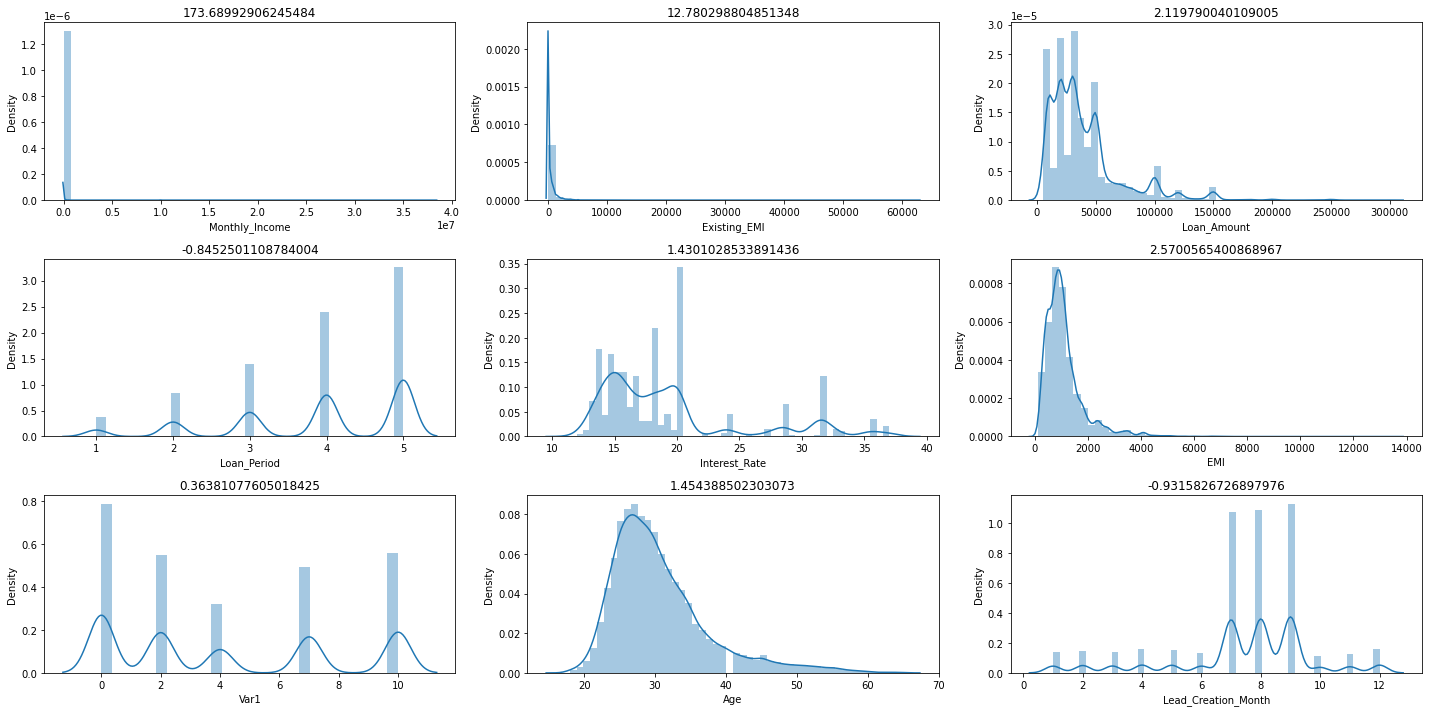

In [15]:
a = 3
b = 3
c = 1

plt.figure(figsize = [20,10])
for i in num_train.columns :
    plt.subplot(a,b,c)
    plt.title(num_train[i].skew())
    sns.distplot(num_train[i])
    c+=1
    
plt.tight_layout()
plt.show()

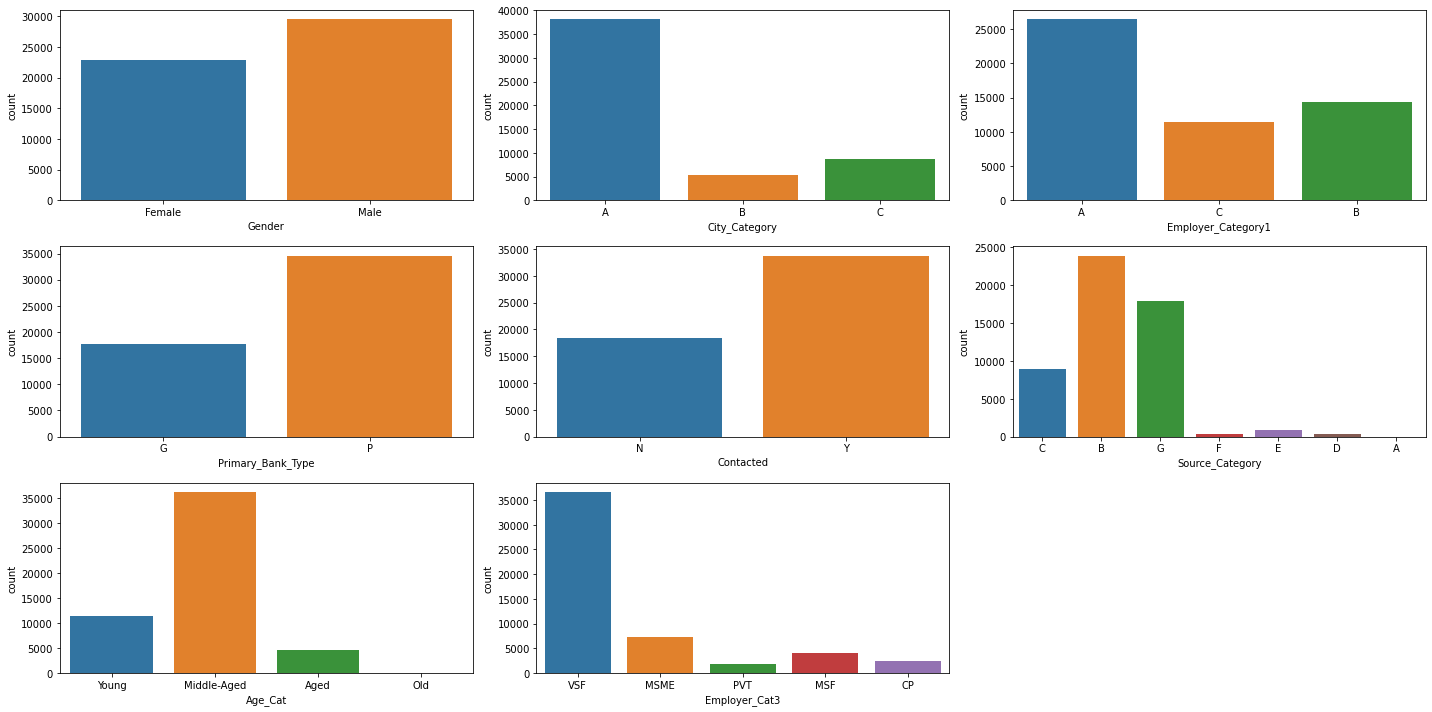

In [16]:
a = 3
b = 3
c = 1

plt.figure(figsize = [20,10])
for i in cat_train.columns :
    plt.subplot(a,b,c)
    sns.countplot(cat_train[i])
    c+=1
    
plt.tight_layout()
plt.show()

### Encoding Categorical Variables

In [17]:
lb = LabelBinarizer()
oe = OrdinalEncoder()

In [18]:
xtrain_gen = pd.DataFrame(lb.fit_transform(xtrain.loc[:,['Gender']]), columns=['Gender']).reset_index(drop=True)
xtest_gen = pd.DataFrame(lb.transform(xtest.loc[:,['Gender']]), columns=['Gender']).reset_index(drop=True)

xtrain_cont = pd.DataFrame(lb.fit_transform(xtrain.loc[:,['Contacted']]), columns=['Contacted']).reset_index(drop=True)
xtest_cont = pd.DataFrame(lb.transform(xtest.loc[:,['Contacted']]), columns=['Contacted']).reset_index(drop=True)

xtrain_bank = pd.DataFrame(lb.fit_transform(xtrain.loc[:,['Primary_Bank_Type']]), columns=['Primary_Bank_Type']).reset_index(drop=True)
xtest_bank = pd.DataFrame(lb.transform(xtest.loc[:,['Primary_Bank_Type']]), columns=['Primary_Bank_Type']).reset_index(drop=True)

In [19]:
xtrain_oe = pd.DataFrame(oe.fit_transform(xtrain.loc[:,['City_Category','Employer_Category1','Source_Category','Age_Cat','Employer_Cat3']]), columns=['City_Category','Employer_Category1','Source_Category','Age_Cat','Employer_Cat3']).reset_index(drop=True)
xtest_oe = pd.DataFrame(oe.transform(xtest.loc[:,['City_Category','Employer_Category1','Source_Category','Age_Cat','Employer_Cat3']]), columns=['City_Category','Employer_Category1','Source_Category','Age_Cat','Employer_Cat3']).reset_index(drop=True)

In [20]:
## Employer Code would be dropped because of redundancy.

In [21]:
xtrain.loc[:,['City_Code','Source']].head()

,City_Code,Source
4761,C10002,S133
25073,C10014,S133
16996,C10003,S133
29429,C10137,S159
9284,C10008,S133


In [22]:
##Removing unnecessary S n C from Source and City_Code respectively.

In [23]:
xtrain.loc[:, 'City_Code'] = xtrain.City_Code.str[1:].astype(int)
xtrain.loc[:, 'Source'] = xtrain.Source.str[1:].astype(int)
xtest.loc[:, 'City_Code'] = xtest.City_Code.str[1:].astype(int)
xtest.loc[:, 'Source'] = xtest.Source.str[1:].astype(int)

In [24]:
ytrain.shape

(52270,)

In [25]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52270 entries, 4761 to 17673
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               52270 non-null  object 
 1   City_Code            52270 non-null  int32  
 2   City_Category        52270 non-null  object 
 3   Employer_Code        52270 non-null  object 
 4   Employer_Category1   52270 non-null  object 
 5   Employer_Category2   52270 non-null  float64
 6   Monthly_Income       52270 non-null  float64
 7   Primary_Bank_Type    52270 non-null  object 
 8   Contacted            52270 non-null  object 
 9   Source               52270 non-null  int32  
 10  Source_Category      52270 non-null  object 
 11  Existing_EMI         52270 non-null  float64
 12  Loan_Amount          33541 non-null  float64
 13  Loan_Period          33541 non-null  float64
 14  Interest_Rate        17824 non-null  float64
 15  EMI                  17824 non-nu

In [26]:
X.head()

,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source,...,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Age,Lead_Creation_Month,Age_Cat,Employer_Cat3
0,Female,C10001,A,COM0044082,A,4.0,2000.0,P,N,S122,...,0.0,NaN,NaN,NaN,NaN,0,37.0,7,Middle-Aged,VSF
1,Male,C10003,A,COM0000002,C,1.0,3500.0,P,Y,S122,...,0.0,20000.0,2.0,13.25,953.0,10,30.0,4,Middle-Aged,CP
2,Male,C10125,C,COM0005267,C,4.0,2250.0,G,Y,S143,...,0.0,45000.0,4.0,NaN,NaN,0,34.0,7,Middle-Aged,VSF
3,Male,C10477,C,COM0004143,A,4.0,3500.0,G,Y,S143,...,0.0,92000.0,5.0,NaN,NaN,7,27.0,9,Middle-Aged,VSF
4,Male,C10002,A,COM0001781,A,4.0,10000.0,P,Y,S134,...,2500.0,50000.0,2.0,NaN,NaN,10,31.0,7,Middle-Aged,VSF


In [27]:
woe = WOE()

woe.fit(xtrain, ytrain)

clf_train= woe.transform(xtrain)
clf_train.head()

,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source,...,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Age,Lead_Creation_Month,Age_Cat,Employer_Cat3
4761,-0.600537,0.148588,0.097853,0.0,-0.382525,-0.054212,-4.232558,-0.529112,-0.780405,0.059791,...,-0.258899,-0.793831,-0.793831,-0.262669,-0.262669,-0.978301,-0.715888,-0.000949,-1.093195,-0.176589
25073,0.302521,-0.267721,-0.010288,0.0,-0.382525,-0.054212,-4.232558,0.191916,0.262554,0.059791,...,-0.258899,-0.021198,0.251846,-0.354264,-0.070589,-1.720984,0.132133,-0.000949,0.160063,-0.176589
16996,-0.600537,0.148588,0.097853,0.0,0.349288,0.276227,0.877714,0.191916,-0.780405,0.059791,...,-0.258899,-0.793831,-0.793831,-0.262669,-0.262669,1.027697,-0.715888,-0.000949,0.160063,0.267050
29429,-0.600537,-0.267721,-0.576951,0.0,-0.382525,-0.054212,-4.232558,0.191916,-0.780405,-0.279869,...,-0.258899,-0.793831,-0.793831,-0.262669,-0.262669,-0.978301,-0.715888,-0.092329,-1.093195,-0.176589
9284,0.302521,0.034822,0.097853,0.0,-0.382525,-0.054212,-4.232558,0.191916,0.262554,0.059791,...,0.385203,0.110352,0.251846,-0.354264,0.292778,-1.720984,0.132133,-0.000949,0.160063,-0.176589


In [28]:
clf_test = woe.transform(xtest)
clf_test.head()

,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source,...,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Age,Lead_Creation_Month,Age_Cat,Employer_Cat3
14599,0.302521,0.034822,0.097853,4.146522,0.228538,-0.054212,0.877714,0.191916,0.262554,0.059791,...,-0.258899,0.612164,0.251846,-0.262669,-0.262669,0.220575,0.132133,-0.000949,0.160063,-0.176589
41117,-0.600537,0.148588,0.097853,COM0013262,0.228538,-0.054212,-4.232558,-0.529112,-0.780405,0.059791,...,-0.258899,-0.793831,-0.793831,-0.262669,-0.262669,-0.978301,-0.715888,0.016311,-1.093195,-0.176589
1805,0.302521,0.034822,0.097853,0.0,-0.382525,-0.054212,0.877714,0.191916,0.262554,-0.279869,...,-0.258899,0.612164,0.251846,1.157333,0.738157,1.027697,0.132133,-0.000949,0.160063,0.267050
29894,0.302521,-0.267721,-0.576951,COM0047421,-0.382525,-0.054212,-0.409401,0.191916,0.262554,0.059791,...,0.385203,0.110352,0.281787,-0.354264,0.292778,0.220575,-0.715888,-0.092329,-1.093195,-0.176589
42451,-0.600537,-0.267721,-0.576951,0.0,-0.382525,-0.054212,-0.409401,-0.529112,-0.780405,0.059791,...,0.385203,-0.793831,-0.793831,-0.262669,-0.262669,-0.978301,0.413106,0.016311,0.160063,-0.176589


In [29]:
clf_train_new = clf_train.loc[:,['City_Code','Source']].reset_index(drop = True)

In [30]:
xtrain_cat_rest = xtrain[['Employer_Category2', 'Var1', 'Lead_Creation_Month']].reset_index(drop=True)

In [31]:
xtrain_encoded_cat = pd.concat([xtrain_gen, xtrain_cont, xtrain_bank, xtrain_oe, xtrain_cat_rest, clf_train_new], axis = 1)

In [32]:
xtrain_encoded_cat.shape

(52270, 13)

In [33]:
xtrain_encoded_cat.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source
0,0,0,0,0.0,0.0,2.0,3.0,4.0,4.0,0,7,0.148588,0.059791
1,1,1,1,1.0,0.0,2.0,1.0,4.0,4.0,2,5,-0.267721,0.059791
2,0,0,1,0.0,2.0,1.0,1.0,2.0,1.0,10,7,0.148588,0.059791
3,0,0,1,2.0,0.0,1.0,3.0,4.0,4.0,0,12,-0.267721,-0.279869
4,1,1,1,0.0,0.0,1.0,1.0,4.0,4.0,2,7,0.034822,0.059791


In [34]:
xtrain.shape

(52270, 21)

In [35]:
pd.options.display.max_columns = None

In [36]:
clf_test_new = clf_test.loc[:,['City_Code','Source']].reset_index(drop = True)

In [37]:
xtest_cat_rest = xtest[['Employer_Category2', 'Var1', 'Lead_Creation_Month']].reset_index(drop=True)

In [38]:
xtest_encoded_cat = pd.concat([xtest_gen, xtest_cont, xtest_bank, xtest_oe, xtest_cat_rest, clf_test_new], axis = 1)

In [39]:
xtest_encoded_cat.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source
0,1,1,1,0.0,1.0,2.0,1.0,4.0,4.0,7,7,0.034822,0.059791
1,0,0,0,0.0,1.0,2.0,3.0,4.0,4.0,0,8,0.148588,0.059791
2,1,1,1,0.0,0.0,2.0,1.0,2.0,4.0,10,4,0.034822,-0.279869
3,1,1,1,2.0,0.0,1.0,3.0,4.0,4.0,7,12,-0.267721,0.059791
4,0,0,0,2.0,0.0,1.0,1.0,4.0,4.0,0,8,-0.267721,0.059791


In [40]:
xtest_encoded_cat.shape

(13068, 13)

In [41]:
xtest.shape

(13068, 21)

### Preparing data for Imputation

In [42]:
xtrain.select_dtypes(include='number').columns

Index(['City_Code', 'Employer_Category2', 'Monthly_Income', 'Source',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI',
       'Var1', 'Age', 'Lead_Creation_Month'],
      dtype='object')

In [43]:
xtrain_num = xtrain.select_dtypes(include='number')
xtrain_num = xtrain_num.drop(['City_Code', 'Employer_Category2', 'Source', 'Var1', 'Lead_Creation_Month'], axis=1).reset_index(drop=True)

In [44]:
xtest_num = xtest.select_dtypes(include='number')
xtest_num = xtest_num.drop(['City_Code', 'Employer_Category2', 'Source', 'Var1', 'Lead_Creation_Month'], axis=1).reset_index(drop=True)

In [45]:
xtrain_final = pd.concat([xtrain_encoded_cat, xtrain_num], axis = 1)

In [46]:
xtest_final = pd.concat([xtest_encoded_cat, xtest_num], axis = 1)

In [47]:
xtrain_final.shape

(52270, 20)

In [48]:
xtest_final.shape

(13068, 20)

### Missing Values Imputation

In [49]:
it = IterativeImputer(estimator = KNeighborsRegressor() )

x_train = it.fit_transform(xtrain_final)

imputed_train = pd.DataFrame(x_train, columns = xtrain_final.columns)

x_test = it.transform(xtest_final)

imputed_test = pd.DataFrame(x_test, columns = xtest_final.columns)

In [50]:
imputed_train.isnull().sum()

Gender                 0
Contacted              0
Primary_Bank_Type      0
City_Category          0
Employer_Category1     0
Source_Category        0
Age_Cat                0
Employer_Cat3          0
Employer_Category2     0
Var1                   0
Lead_Creation_Month    0
City_Code              0
Source                 0
Monthly_Income         0
Existing_EMI           0
Loan_Amount            0
Loan_Period            0
Interest_Rate          0
EMI                    0
Age                    0
dtype: int64

In [51]:
imputed_test.isnull().sum()

Gender                 0
Contacted              0
Primary_Bank_Type      0
City_Category          0
Employer_Category1     0
Source_Category        0
Age_Cat                0
Employer_Cat3          0
Employer_Category2     0
Var1                   0
Lead_Creation_Month    0
City_Code              0
Source                 0
Monthly_Income         0
Existing_EMI           0
Loan_Amount            0
Loan_Period            0
Interest_Rate          0
EMI                    0
Age                    0
dtype: int64

In [52]:
xtrain_final.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age
0,0,0,0,0.0,0.0,2.0,3.0,4.0,4.0,0,7,0.148588,0.059791,1680.0,0.0,NaN,NaN,NaN,NaN,25.0
1,1,1,1,1.0,0.0,2.0,1.0,4.0,4.0,2,5,-0.267721,0.059791,1350.0,0.0,30000.0,5.0,20.0,795.0,28.0
2,0,0,1,0.0,2.0,1.0,1.0,2.0,1.0,10,7,0.148588,0.059791,5200.0,0.0,NaN,NaN,NaN,NaN,26.0
3,0,0,1,2.0,0.0,1.0,3.0,4.0,4.0,0,12,-0.267721,-0.279869,1500.0,0.0,NaN,NaN,NaN,NaN,25.0
4,1,1,1,0.0,0.0,1.0,1.0,4.0,4.0,2,7,0.034822,0.059791,1500.0,600.0,11000.0,5.0,20.0,291.0,28.0


In [53]:
imputed_train.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age
0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,0.0,7.0,0.148588,0.059791,1680.0,0.0,20000.0,3.4,22.300,666.0,25.0
1,1.0,1.0,1.0,1.0,0.0,2.0,1.0,4.0,4.0,2.0,5.0,-0.267721,0.059791,1350.0,0.0,30000.0,5.0,20.000,795.0,28.0
2,0.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,10.0,7.0,0.148588,0.059791,5200.0,0.0,95200.0,4.8,15.488,2387.8,26.0
3,0.0,0.0,1.0,2.0,0.0,1.0,3.0,4.0,4.0,0.0,12.0,-0.267721,-0.279869,1500.0,0.0,24000.0,3.8,31.500,885.0,25.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0,2.0,7.0,0.034822,0.059791,1500.0,600.0,11000.0,5.0,20.000,291.0,28.0


### Distribution of the 4 Attributes Before Imputation

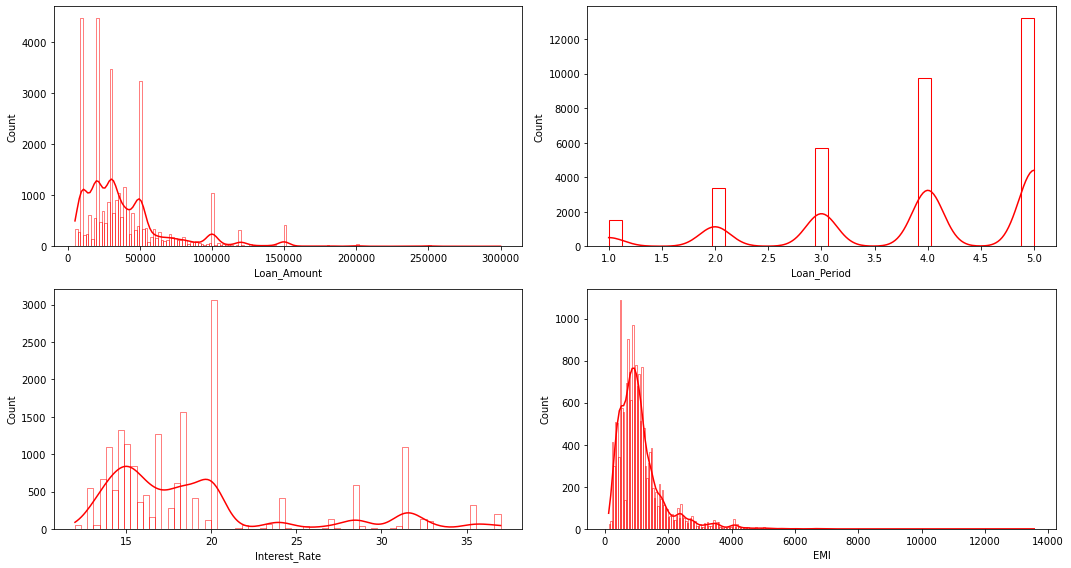

In [54]:
plt.figure(figsize=[15, 8])
i = 1

for x in xtrain_final[['Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI']]:
    plt.subplot(2, 2, i)
    sns.histplot(xtrain_final[x], kde=True, fill=False,color='red',palette="flare")
    i += 1
    
plt.tight_layout()
plt.show()

### Distribution of the 4 Attributes After Imputation

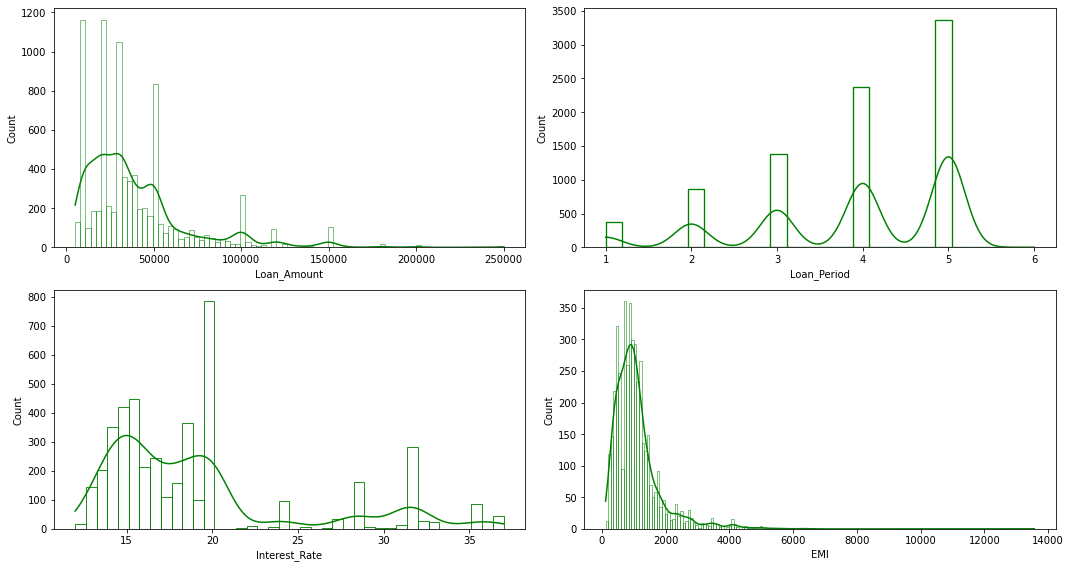

In [55]:
plt.figure(figsize=[15, 8])
i = 1

for x in imputed_train[['Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI']]:
    plt.subplot(2, 2, i)
    sns.histplot(xtest_final[x], kde=True, fill=False,color='green',palette='flare')
    i += 1
    
plt.tight_layout()
plt.show()

# SMOTE (To Solve Imbalance in Target)

In [56]:
imputed_train.shape

(52270, 20)

In [57]:
imputed_train.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age
0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,0.0,7.0,0.148588,0.059791,1680.0,0.0,20000.0,3.4,22.300,666.0,25.0
1,1.0,1.0,1.0,1.0,0.0,2.0,1.0,4.0,4.0,2.0,5.0,-0.267721,0.059791,1350.0,0.0,30000.0,5.0,20.000,795.0,28.0
2,0.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,10.0,7.0,0.148588,0.059791,5200.0,0.0,95200.0,4.8,15.488,2387.8,26.0
3,0.0,0.0,1.0,2.0,0.0,1.0,3.0,4.0,4.0,0.0,12.0,-0.267721,-0.279869,1500.0,0.0,24000.0,3.8,31.500,885.0,25.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0,2.0,7.0,0.034822,0.059791,1500.0,600.0,11000.0,5.0,20.000,291.0,28.0


### Distribution of Train data before oversampling

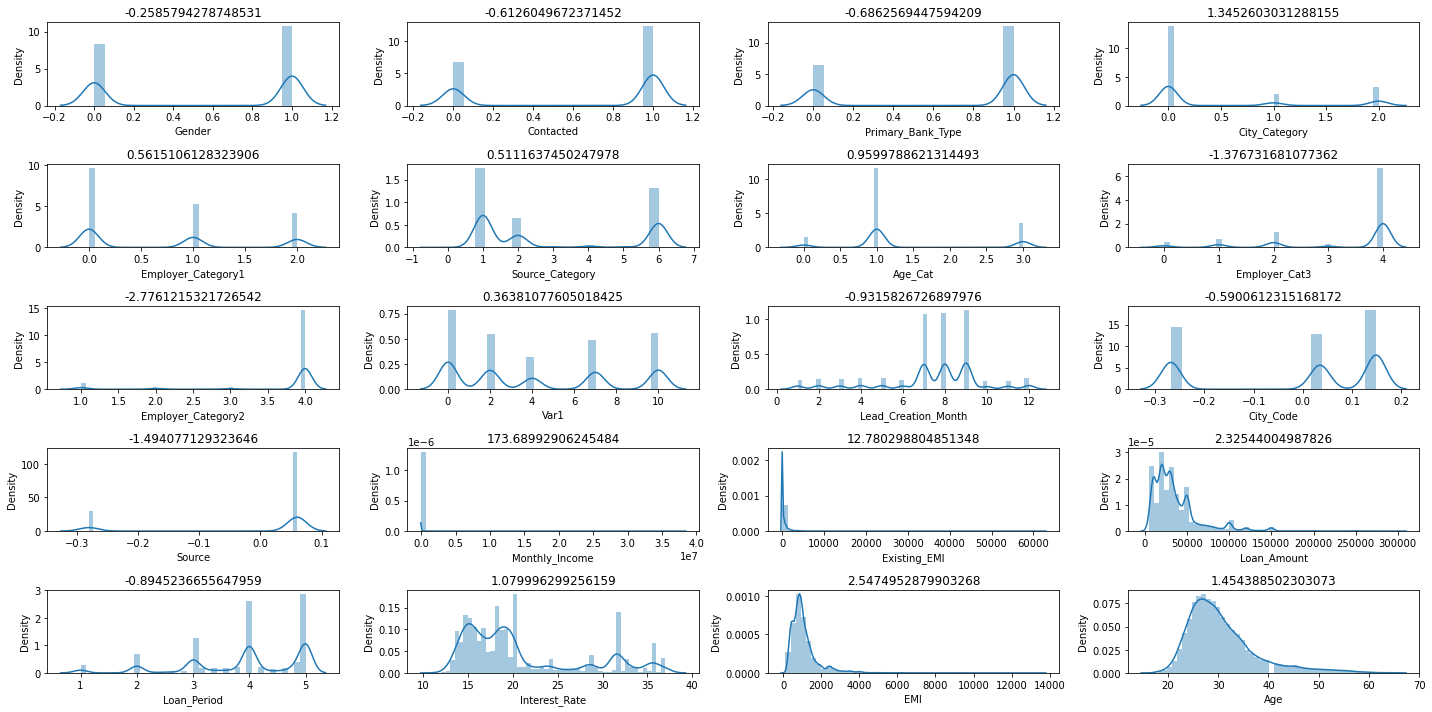

In [58]:
a = 5
b = 4
c = 1

plt.figure(figsize = [20,10])

for i in imputed_train.columns :
    plt.subplot(a,b,c)
    plt.title(imputed_train[i].skew())
    sns.distplot(imputed_train[i])
    c+=1
    
plt.tight_layout()
plt.show()
    

In [59]:
ytrain.shape

(52270,)

In [60]:
ytrain.value_counts()

0    51456
1      814
Name: Approved, dtype: int64

In [61]:
imputed_test.shape

(13068, 20)

In [62]:
imputed_test.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age
0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,4.0,4.0,7.0,7.0,0.034822,0.059791,3550.0,0.0,57000.0,5.0,14.264,1519.0,31.0
1,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,4.0,0.0,8.0,0.148588,0.059791,1000.0,0.0,27000.0,4.8,18.950,837.8,20.0
2,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,4.0,10.0,4.0,0.034822,-0.279869,8000.0,0.0,139000.0,5.0,14.850,3296.0,31.0
3,1.0,1.0,1.0,2.0,0.0,1.0,3.0,4.0,4.0,7.0,12.0,-0.267721,0.059791,2800.0,900.0,10000.0,2.0,20.000,509.0,24.0
4,0.0,0.0,0.0,2.0,0.0,1.0,1.0,4.0,4.0,0.0,8.0,-0.267721,0.059791,2625.0,1000.0,18600.0,4.0,20.800,585.2,35.0


### Distribution of Test data before oversampling

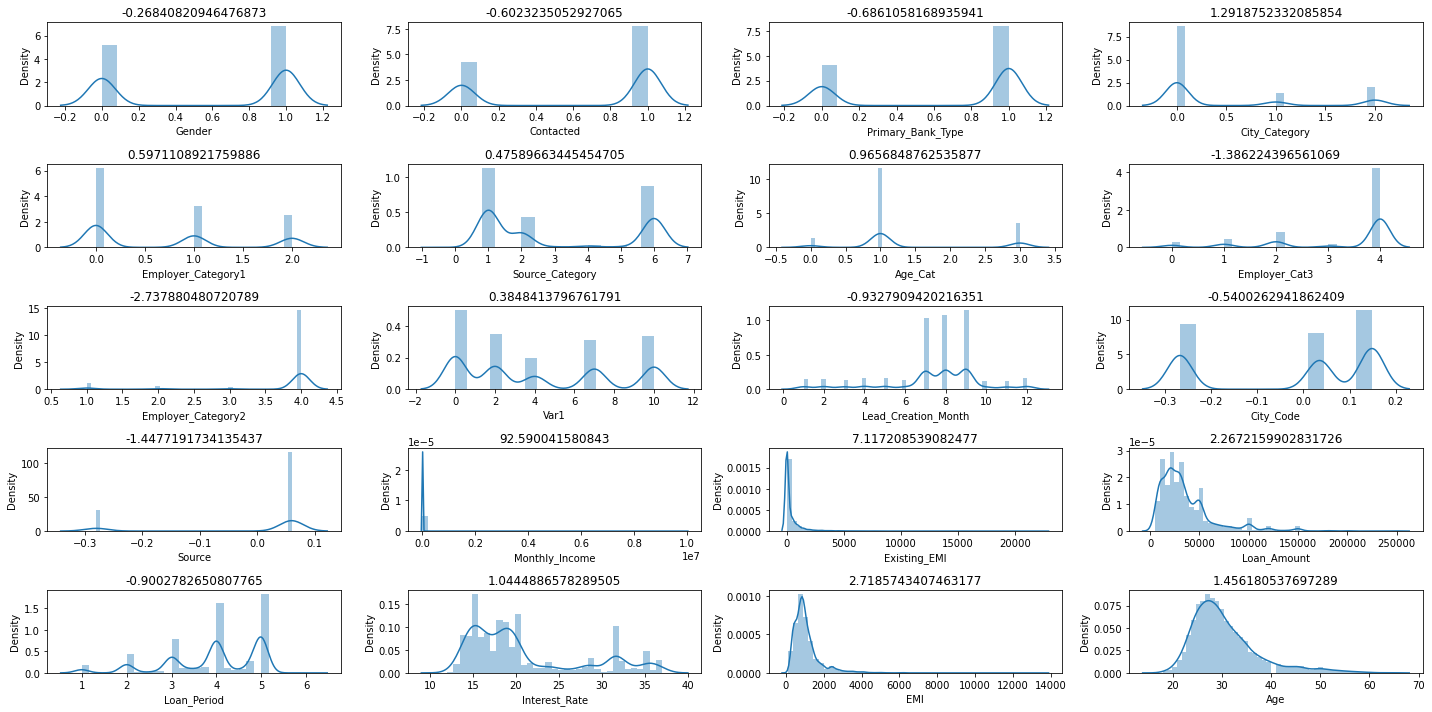

In [63]:
a = 5
b = 4
c = 1

plt.figure(figsize = [20,10])

for i in imputed_test.columns :
    plt.subplot(a,b,c)
    plt.title(imputed_test[i].skew())
    sns.distplot(imputed_test[i])
    c+=1
    
plt.tight_layout()
plt.show()
    

In [64]:
ytest.shape

(13068,)

In [65]:
ytest.value_counts()

0    12867
1      201
Name: Approved, dtype: int64

### Applying SMOTE

In [66]:
sm = SMOTE(0.43,sampling_strategy = 'float', random_state=10)
xtrain_samp, ytrain_samp = sm.fit_resample(imputed_train, ytrain)
xtrain_samp.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age
0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,0.0,7.0,0.148588,0.059791,1680.0,0.0,20000.0,3.4,22.300,666.0,25.0
1,1.0,1.0,1.0,1.0,0.0,2.0,1.0,4.0,4.0,2.0,5.0,-0.267721,0.059791,1350.0,0.0,30000.0,5.0,20.000,795.0,28.0
2,0.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,10.0,7.0,0.148588,0.059791,5200.0,0.0,95200.0,4.8,15.488,2387.8,26.0
3,0.0,0.0,1.0,2.0,0.0,1.0,3.0,4.0,4.0,0.0,12.0,-0.267721,-0.279869,1500.0,0.0,24000.0,3.8,31.500,885.0,25.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0,2.0,7.0,0.034822,0.059791,1500.0,600.0,11000.0,5.0,20.000,291.0,28.0


In [67]:
sm = SMOTE(0.43,sampling_strategy = 'float', random_state=10)
xtest_samp, ytest_samp = sm.fit_resample(imputed_test, ytest)
xtest_samp.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age
0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,4.0,4.0,7.0,7.0,0.034822,0.059791,3550.0,0.0,57000.0,5.0,14.264,1519.0,31.0
1,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,4.0,0.0,8.0,0.148588,0.059791,1000.0,0.0,27000.0,4.8,18.950,837.8,20.0
2,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,4.0,10.0,4.0,0.034822,-0.279869,8000.0,0.0,139000.0,5.0,14.850,3296.0,31.0
3,1.0,1.0,1.0,2.0,0.0,1.0,3.0,4.0,4.0,7.0,12.0,-0.267721,0.059791,2800.0,900.0,10000.0,2.0,20.000,509.0,24.0
4,0.0,0.0,0.0,2.0,0.0,1.0,1.0,4.0,4.0,0.0,8.0,-0.267721,0.059791,2625.0,1000.0,18600.0,4.0,20.800,585.2,35.0


### Distribution of Train Data After Oversampling

In [68]:
xtrain_samp.shape   ## 21,312 records added

(73582, 20)

In [69]:
xtrain_samp.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age
0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,0.0,7.0,0.148588,0.059791,1680.0,0.0,20000.0,3.4,22.300,666.0,25.0
1,1.0,1.0,1.0,1.0,0.0,2.0,1.0,4.0,4.0,2.0,5.0,-0.267721,0.059791,1350.0,0.0,30000.0,5.0,20.000,795.0,28.0
2,0.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,10.0,7.0,0.148588,0.059791,5200.0,0.0,95200.0,4.8,15.488,2387.8,26.0
3,0.0,0.0,1.0,2.0,0.0,1.0,3.0,4.0,4.0,0.0,12.0,-0.267721,-0.279869,1500.0,0.0,24000.0,3.8,31.500,885.0,25.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0,2.0,7.0,0.034822,0.059791,1500.0,600.0,11000.0,5.0,20.000,291.0,28.0


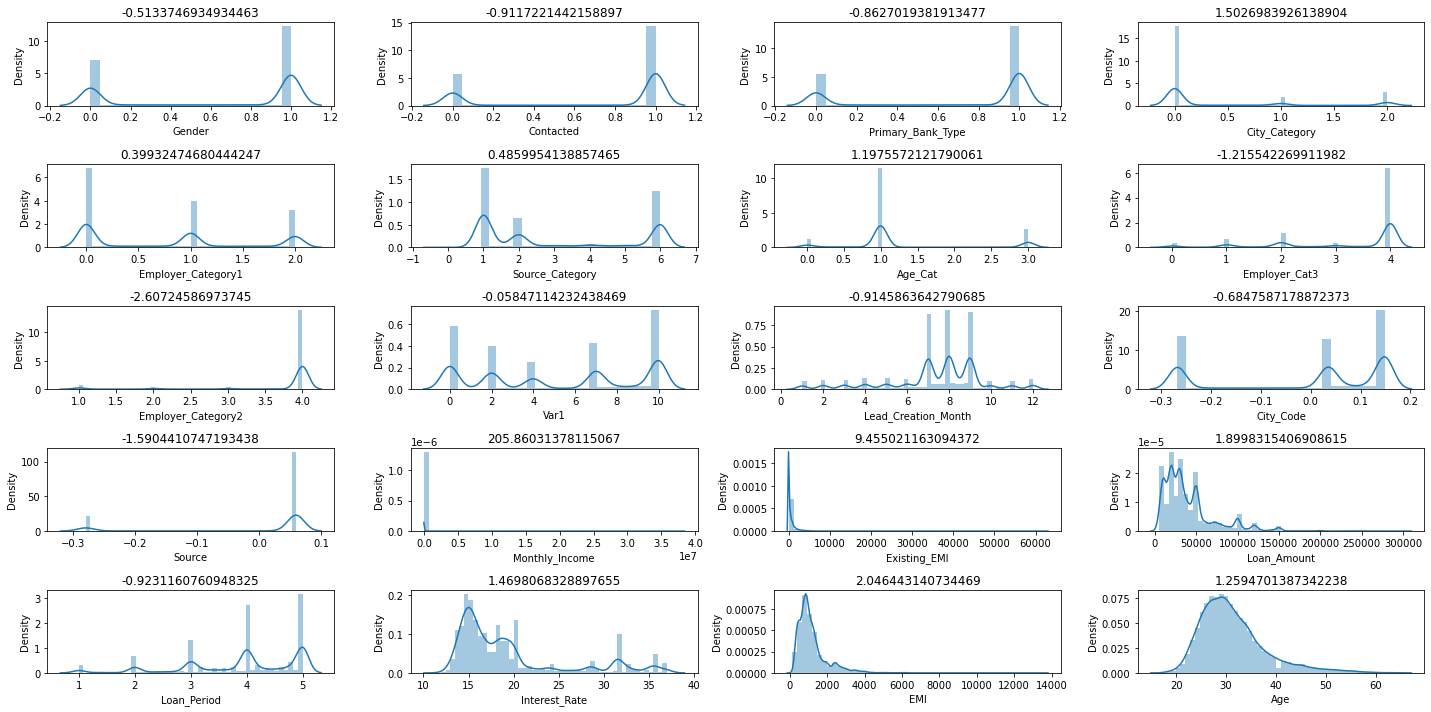

In [70]:
a = 5
b = 4
c = 1

plt.figure(figsize = [20,10])

for i in xtrain_samp.columns :
    plt.subplot(a,b,c)
    plt.title(xtrain_samp[i].skew())
    sns.distplot(xtrain_samp[i])
    c+=1
    
plt.tight_layout()
plt.show()
    

In [71]:
ytrain_samp.shape   ## 21,312 records added

(73582,)

In [72]:
ytrain_samp.value_counts()   ## Target resampled to 70:30 ratio of Majority : Minority Class

0    51456
1    22126
Name: Approved, dtype: int64

### Distribution of Test Data After Oversampling

In [73]:
xtest_samp.shape  ##5,331 records added 

(18399, 20)

In [74]:
xtest_samp.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age
0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,4.0,4.0,7.0,7.0,0.034822,0.059791,3550.0,0.0,57000.0,5.0,14.264,1519.0,31.0
1,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,4.0,0.0,8.0,0.148588,0.059791,1000.0,0.0,27000.0,4.8,18.950,837.8,20.0
2,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,4.0,10.0,4.0,0.034822,-0.279869,8000.0,0.0,139000.0,5.0,14.850,3296.0,31.0
3,1.0,1.0,1.0,2.0,0.0,1.0,3.0,4.0,4.0,7.0,12.0,-0.267721,0.059791,2800.0,900.0,10000.0,2.0,20.000,509.0,24.0
4,0.0,0.0,0.0,2.0,0.0,1.0,1.0,4.0,4.0,0.0,8.0,-0.267721,0.059791,2625.0,1000.0,18600.0,4.0,20.800,585.2,35.0


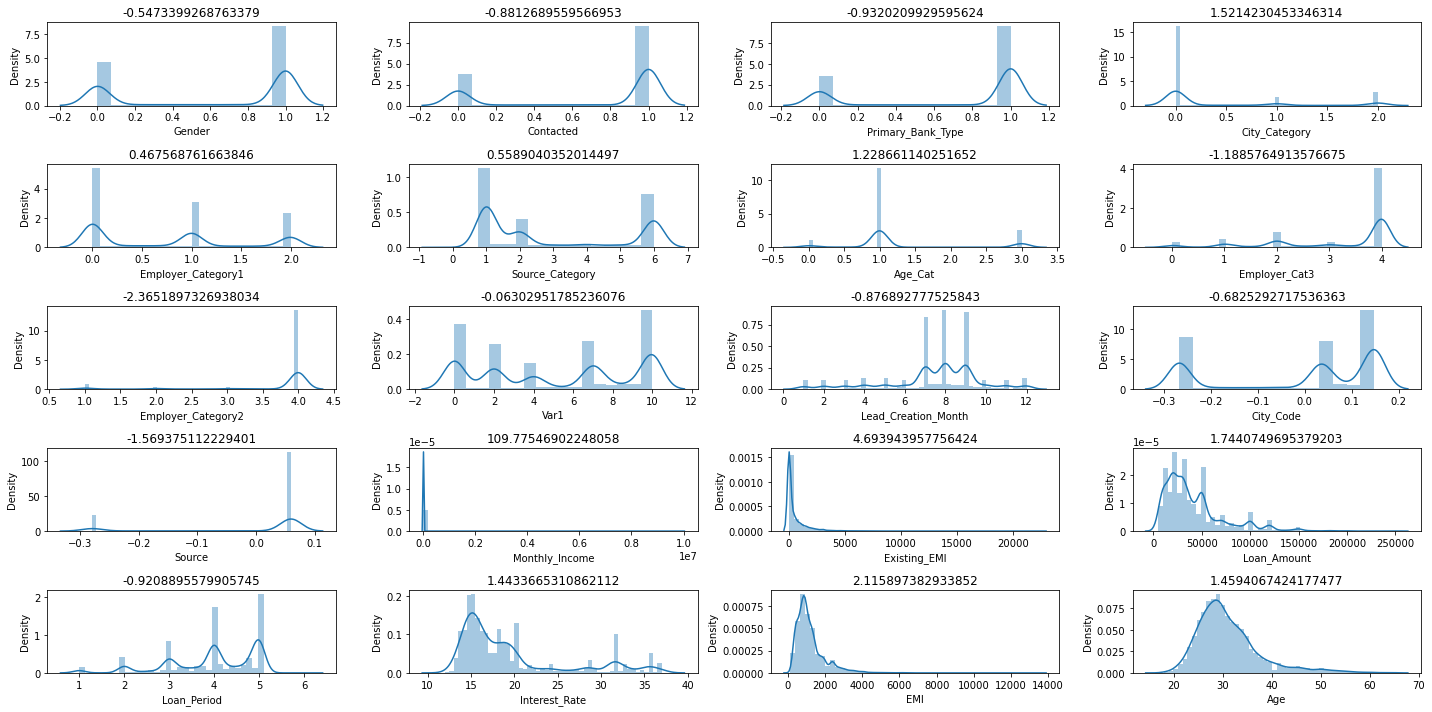

In [75]:
a = 5
b = 4
c = 1

plt.figure(figsize = [20,10])

for i in xtest_samp.columns :
    plt.subplot(a,b,c)
    plt.title(xtest_samp[i].skew())
    sns.distplot(xtest_samp[i])
    c+=1
    
plt.tight_layout()
plt.show()
    

In [76]:
ytest_samp.shape    ##5,331 records added

(18399,)

In [77]:
ytest_samp.value_counts()     ## Target resampled to 70:30 ratio of Majority : Minority Class

0    12867
1     5532
Name: Approved, dtype: int64

### Exclusive Categorical Encoded Columns which needs to be remapped with initial distribution in X are Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1

In [78]:
xtrain_samp2 = xtrain_samp.copy()
xtest_samp2 = xtest_samp.copy()

#### 1.Gender

In [79]:
imputed_train.Gender.nunique()

2

In [80]:
imputed_train.Gender.unique()

array([0., 1.])

In [81]:
imputed_test.Gender.nunique()

2

In [82]:
# For xtrain
x = [0 if i < 0.5 else 1 for i in xtrain_samp.Gender]

xtrain_samp2.Gender = pd.Series(x)
xtrain_samp2.Gender.nunique()

2

In [83]:
#For xtest
y = [0 if i < 0.5 else 1 for i in xtest_samp.Gender]

xtest_samp2.Gender = pd.Series(y)
xtest_samp2.Gender.nunique()

2

#### 2.Contacted

In [84]:
imputed_train.Contacted.nunique()

2

In [85]:
imputed_train.Contacted.unique()

array([0., 1.])

In [86]:
imputed_test.Contacted.nunique()

2

In [87]:
# For xtrain
x = [0 if i < 0.5 else 1 for i in xtrain_samp.Contacted]

xtrain_samp2.Contacted = pd.Series(x)
xtrain_samp2.Contacted.nunique()

2

In [88]:
#For xtest
y = [0 if i < 0.5 else 1 for i in xtest_samp.Contacted]

xtest_samp2.Contacted = pd.Series(y)
xtest_samp2.Contacted.nunique()

2

#### 3. Primary_Bank_Type

In [89]:
imputed_train['Primary_Bank_Type'].nunique()

2

In [90]:
imputed_train['Primary_Bank_Type'].unique()

array([0., 1.])

In [91]:
imputed_test['Primary_Bank_Type'].nunique()

2

In [92]:
# For xtrain
x = [0 if i < 0.5 else 1 for i in xtrain_samp['Primary_Bank_Type']]

xtrain_samp2['Primary_Bank_Type'] = pd.Series(x)
xtrain_samp2['Primary_Bank_Type'].nunique()

2

In [93]:
#For xtest
y = [0 if i < 0.5 else 1 for i in xtest_samp['Primary_Bank_Type']]

xtest_samp2['Primary_Bank_Type'] = pd.Series(y)
xtest_samp2['Primary_Bank_Type'].nunique()

2

#### 4. City_Category

In [94]:
imputed_train['City_Category'].nunique()

3

In [95]:
imputed_train['City_Category'].unique()

array([0., 1., 2.])

In [96]:
imputed_test['City_Category'].nunique()

3

In [97]:
# For xtrain

def cc(x):
    if x<0.5 :
        return(0)
    elif (x>=0.5) & (x<1) :
        return(1)
    elif (x>=1) & (x<1.5) :
        return(1)
    else :
        return(2)
    
    
xtrain_samp2['City_Category'] = xtrain_samp2['City_Category'].map(cc)

In [98]:
xtrain_samp2['City_Category'].nunique()

3

In [99]:
# For xtest

xtest_samp2['City_Category'] = xtest_samp2['City_Category'].map(cc)

In [100]:
xtest_samp2['City_Category'].nunique()

3

#### 5.Employer_Category1

In [101]:
imputed_train['Employer_Category1'].nunique()

3

In [102]:
imputed_train['Employer_Category1'].unique()

array([0., 2., 1.])

In [103]:
imputed_test['Employer_Category1'].nunique()

3

In [104]:
# For xtrain

xtrain_samp2['Employer_Category1'] = xtrain_samp2['Employer_Category1'].map(cc)


In [105]:
xtrain_samp2['Employer_Category1'].nunique()

3

In [106]:
# For xtest

xtest_samp2['Employer_Category1'] = xtest_samp2['Employer_Category1'].map(cc)
xtest_samp2['Employer_Category1'].nunique()

3

#### 6.Source_Category

In [107]:
imputed_train['Source_Category'].nunique()

7

In [108]:
imputed_train['Source_Category'].unique()

array([2., 1., 6., 5., 4., 3., 0.])

In [109]:
imputed_test['Source_Category'].nunique()

7

In [110]:
# For xtrain

def sc(x) :
    if x<0.5 :
        return(0)
    elif (x>=0.5) & (x<1) :
        return(1)
    elif (x>=1) & (x<1.5) :
        return(1)
    elif (x>=1.5) & (x<2) :
        return(2)
    elif (x>=2) & (x<2.5):
        return(2)
    elif (x>=2.5) & (x<3) :
        return(3)
    elif (x>=3) & (x<3.5) :
        return(3)
    elif (x>=3.5) & (x<4) :
        return(4)
    elif (x>=4) & (x<4.5):
        return(4)
    elif (x>=4.5) & (x<5) :
        return(5)
    elif (x>=5) & (x<5.5) :
        return(5)
    else :
        return(6)
    
xtrain_samp2['Source_Category'] = xtrain_samp2['Source_Category'].map(sc)    

In [111]:
xtrain_samp2['Source_Category'].nunique()

7

In [112]:
# For xtest

xtest_samp2['Source_Category'] = xtest_samp2['Source_Category'].map(sc)
xtest_samp2['Source_Category'].nunique()

7

#### 7.Age_Cat

In [113]:
imputed_train['Age_Cat'].nunique()

4

In [114]:
imputed_train['Age_Cat'].unique()

array([3., 1., 0., 2.])

In [115]:
imputed_test['Age_Cat'].nunique()

4

In [116]:
# For xtrain

def ac(x):
    if x<0.5 :
        return(0)
    elif (x>=0.5) & (x<1) :
        return(1)
    elif (x>=1) & (x<1.5) :
        return(1)
    elif (x>=1.5) & (x<2) :
        return(2)
    elif (x>=2) & (x<2.5) :
        return(2)
    else :
        return(3)
    
xtrain_samp2['Age_Cat'] = xtrain_samp2['Age_Cat'].map(ac)    

In [117]:
xtrain_samp2['Age_Cat'].nunique()

4

In [118]:
# For xtest

xtest_samp2['Age_Cat'] = xtest_samp2['Age_Cat'].map(ac)
xtest_samp2['Age_Cat'].nunique()

4

#### 8. Employer_Cat3

In [119]:
imputed_train['Employer_Cat3'].nunique()

5

In [120]:
imputed_train['Employer_Cat3'].unique()

array([4., 2., 3., 1., 0.])

In [121]:
imputed_test['Employer_Cat3'].nunique()

5

In [122]:
# For xtrain

def ec(x):
    if x<0.5 :
        return(0)
    elif (x>=0.5) & (x<1) :
        return(1)
    elif (x>=1) & (x<1.5) :
        return(1)
    elif (x>=1.5) & (x<2) :
        return(2)
    elif (x>=2) & (x<2.5) :
        return(2)
    elif (x>=2.5) & (x<3) :
        return(3)
    elif (x>=3) & (x<3.5) :
        return(3)
    else :
        return(4)
        
    
xtrain_samp2['Employer_Cat3'] = xtrain_samp2['Employer_Cat3'].map(ec)    

In [123]:
xtrain_samp2['Employer_Cat3'].nunique()

5

In [124]:
# For xtest

xtest_samp2['Employer_Cat3'] = xtest_samp2['Employer_Cat3'].map(ec)    
xtest_samp2['Employer_Cat3'].nunique()

5

#### 9. Employer_Category2

In [125]:
imputed_train['Employer_Category2'].nunique()

4

In [126]:
imputed_train['Employer_Category2'].unique()

array([4., 1., 2., 3.])

In [127]:
imputed_test['Employer_Category2'].nunique()

4

In [128]:
def eac(x):
    if x<1.5 :
        return(1)
    elif (x>=1.5) & (x<2) :
        return(2)
    elif (x>=2) & (x<2.5) :
        return(2)
    elif (x>=2.5) & (x<3) :
        return(3)
    elif (x>=3) & (x<3.5) :
        return(3)
    else :
        return(4)

In [129]:
# For xtrain

xtrain_samp2['Employer_Category2'] = xtrain_samp2['Employer_Category2'].map(eac)
xtrain_samp2['Employer_Category2'].nunique()

4

In [130]:
# For xtest

xtest_samp2['Employer_Category2'] = xtest_samp2['Employer_Category2'].map(eac)    
xtest_samp2['Employer_Category2'].nunique()

4

#### 10.Var1

In [131]:
imputed_train['Var1'].nunique()

5

In [132]:
imputed_train['Var1'].unique()

array([ 0.,  2., 10.,  4.,  7.])

In [133]:
imputed_test['Var1'].nunique()

5

In [134]:
def vc(x):
    if x<1 :
        return(0)
    elif (x>=1) & (x<2) :
        return(2)
    elif (x>=2) & (x<3) :
        return(2)
    elif (x>=3) & (x<4) :
        return(4)
    elif (x>=4) & (x<5.5) :
        return(4)
    elif (x>=5.5) & (x<7) :
        return(7)
    elif (x>=7) & (x<8.5) :
        return(7)
    else :
        return(10)

In [135]:
# For xtrain

xtrain_samp2['Var1'] = xtrain_samp2['Var1'].map(vc)
xtrain_samp2['Var1'].nunique()

5

In [136]:
# For xtest

xtest_samp2['Var1'] = xtest_samp2['Var1'].map(vc)    
xtest_samp2['Var1'].nunique()

5

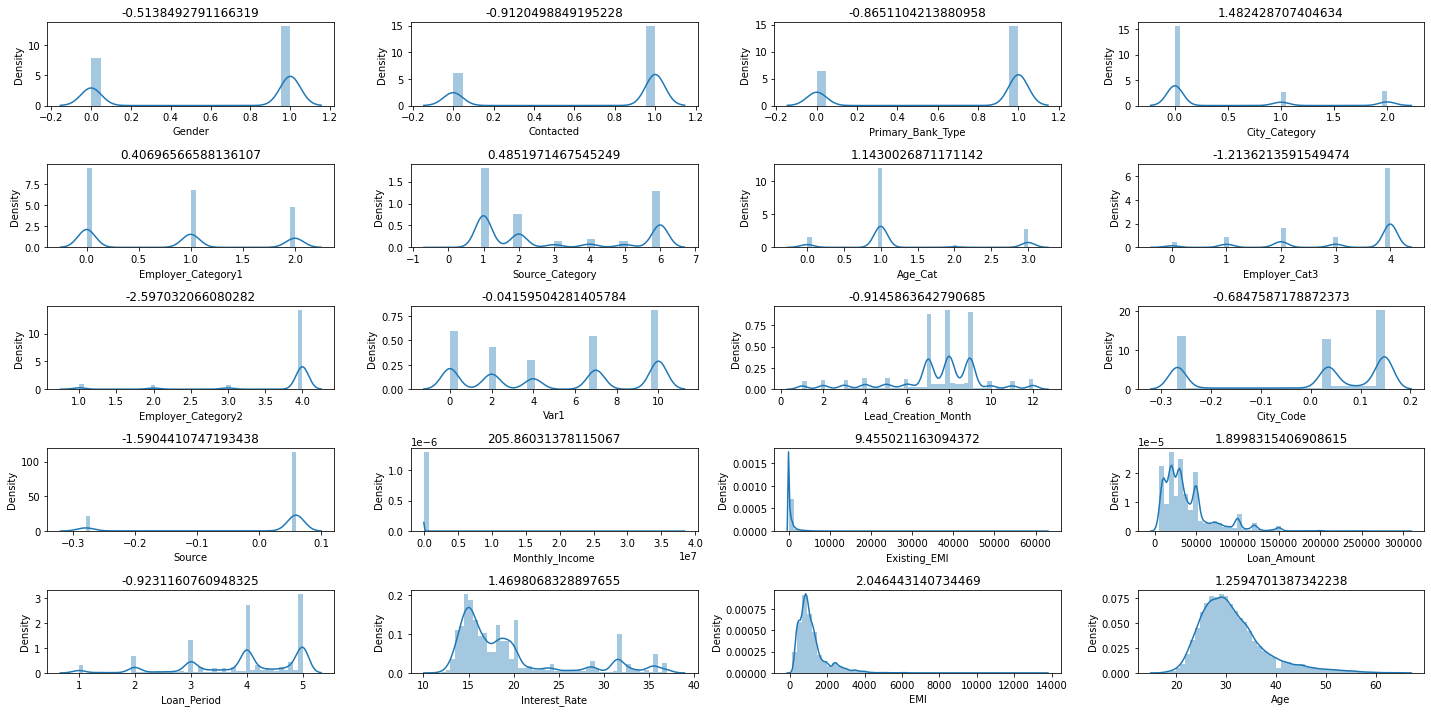

In [137]:
## Distribution of Train after correcting sampling



a = 5
b = 4
c = 1

plt.figure(figsize = [20,10])

for i in xtrain_samp2.columns :
    plt.subplot(a,b,c)
    plt.title(xtrain_samp2[i].skew())
    sns.distplot(xtrain_samp2[i])
    c+=1
    
plt.tight_layout()
plt.show()
    

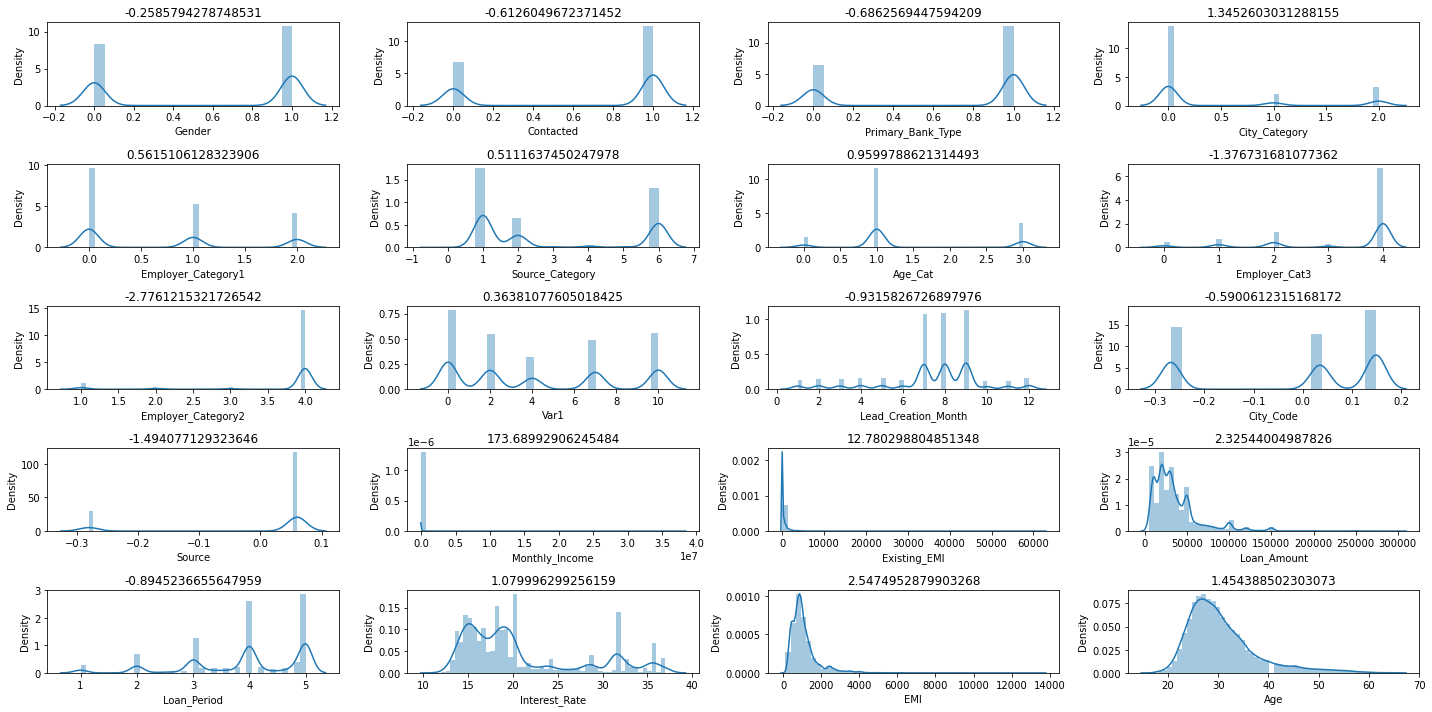

In [138]:
##Imputed train Distributions


a = 5
b = 4
c = 1

plt.figure(figsize = [20,10])

for i in imputed_train.columns :
    plt.subplot(a,b,c)
    plt.title(imputed_train[i].skew())
    sns.distplot(imputed_train[i])
    c+=1
    
plt.tight_layout()
plt.show()
    
    

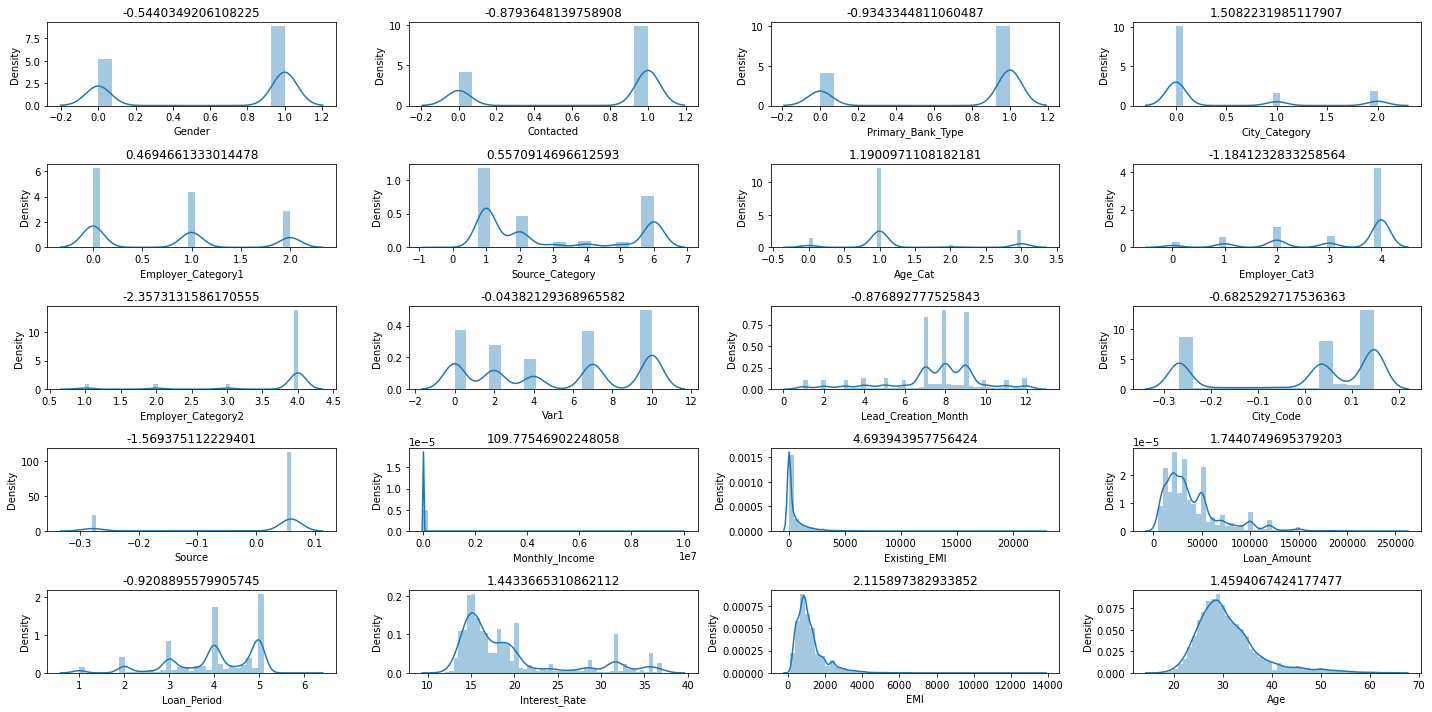

In [139]:
## Distribution of Test after correcting sampling



a = 5
b = 4
c = 1

plt.figure(figsize = [20,10])

for i in xtest_samp2.columns :
    plt.subplot(a,b,c)
    plt.title(xtest_samp2[i].skew())
    sns.distplot(xtest_samp2[i])
    c+=1
    
plt.tight_layout()
plt.show()
    

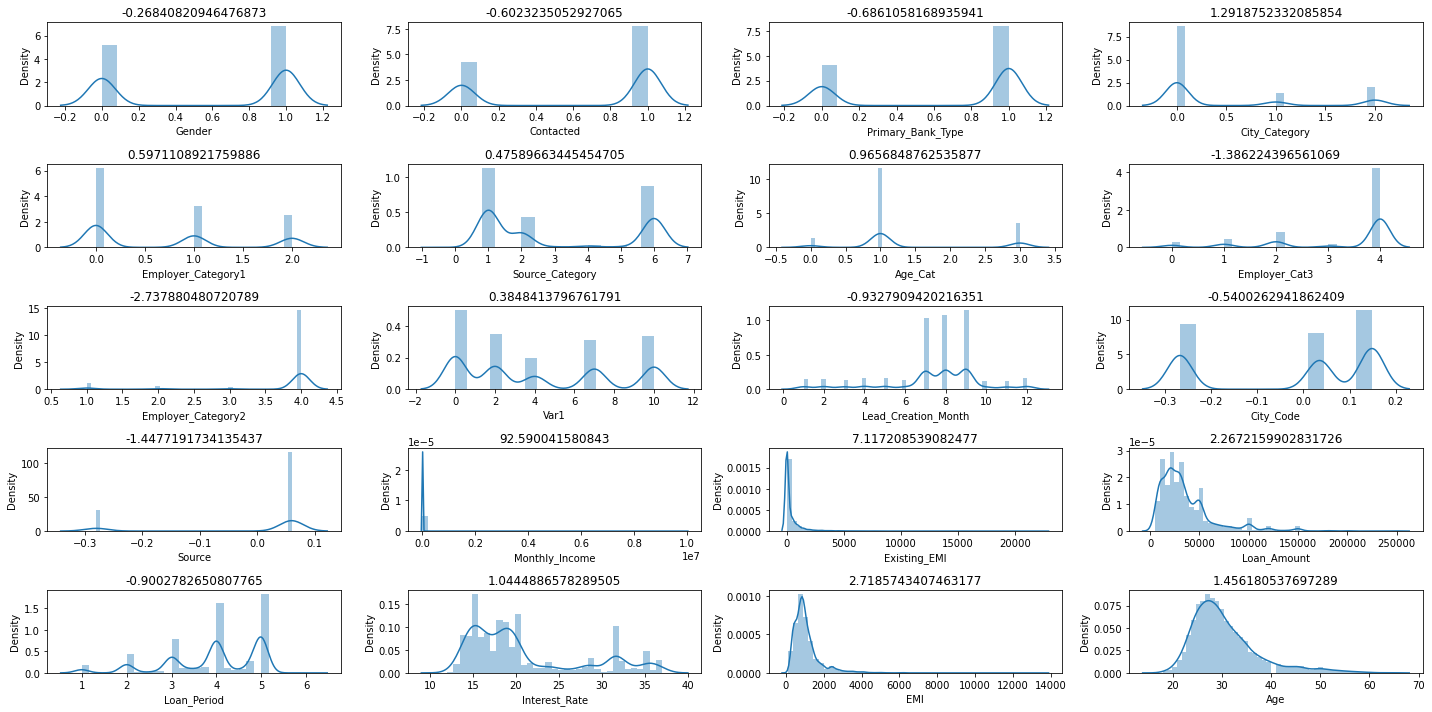

In [140]:
##Imputed test Distributions


a = 5
b = 4
c = 1

plt.figure(figsize = [20,10])

for i in imputed_test.columns :
    plt.subplot(a,b,c)
    plt.title(imputed_test[i].skew())
    sns.distplot(imputed_test[i])
    c+=1
    
plt.tight_layout()
plt.show()
    
    

### Inference of SMOTE - After applying Smote, we have resampled the initial imbalanced target to a 70:30 majority to minority class samples. After making effective corrections in resampling of categorical encoded variables , we observe that the distributions before and after smote doesn't change , thus giving us a reliable wayforward for further data pre-processing for modelling.

# Scaling of Required Numerical Variables

In [141]:
num_samp_train = xtrain_samp2.iloc[:,[10,13,14,15,16,17,18,19]]
num_samp_test =  xtest_samp2.iloc[:,[10,13,14,15,16,17,18,19]]

rest_samp_train = xtrain_samp2.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12]].reset_index(drop = True)
rest_samp_test = xtest_samp2.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12]].reset_index(drop = True)

In [142]:
num_samp_train.head()

,Lead_Creation_Month,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age
0,7.0,1680.0,0.0,20000.0,3.4,22.300,666.0,25.0
1,5.0,1350.0,0.0,30000.0,5.0,20.000,795.0,28.0
2,7.0,5200.0,0.0,95200.0,4.8,15.488,2387.8,26.0
3,12.0,1500.0,0.0,24000.0,3.8,31.500,885.0,25.0
4,7.0,1500.0,600.0,11000.0,5.0,20.000,291.0,28.0


In [143]:
num_samp_train.shape[1]

8

In [144]:
rest_samp_train.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,City_Code,Source
0,0,0,0,0,0,2,3,4,4,0,0.148588,0.059791
1,1,1,1,1,0,2,1,4,4,2,-0.267721,0.059791
2,0,0,1,0,2,1,1,2,1,10,0.148588,0.059791
3,0,0,1,2,0,1,3,4,4,0,-0.267721,-0.279869
4,1,1,1,0,0,1,1,4,4,2,0.034822,0.059791


In [145]:
rest_samp_train.shape[1]

12

In [146]:
sc = StandardScaler()

sct = sc.fit_transform(num_samp_train)

scaled_train = pd.DataFrame(sct,columns = num_samp_train.columns).reset_index(drop = True)

In [147]:
sct2 = sc.transform(num_samp_test)

scaled_test = pd.DataFrame(sct2,columns = num_samp_test.columns).reset_index(drop = True)

In [148]:
final_train = pd.concat([scaled_train,rest_samp_train], axis = 1)

In [149]:
final_train.head()

,Lead_Creation_Month,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,City_Code,Source
0,-0.183539,-0.025942,-0.414966,-0.637807,-0.507182,0.491887,-0.650433,-0.952706,0,0,0,0,0,2,3,4,4,0,0.148588,0.059791
1,-1.087895,-0.028031,-0.414966,-0.315544,1.051382,0.116813,-0.483966,-0.499241,1,1,1,1,0,2,1,4,4,2,-0.267721,0.059791
2,-0.183539,-0.003659,-0.414966,1.785612,0.856562,-0.618985,1.571455,-0.801551,0,0,1,0,2,1,1,2,1,10,0.148588,0.059791
3,2.077352,-0.027082,-0.414966,-0.508902,-0.117541,1.992183,-0.367826,-0.952706,0,0,1,2,0,1,3,4,4,0,-0.267721,-0.279869
4,-0.183539,-0.027082,0.092805,-0.927844,1.051382,0.116813,-1.134350,-0.499241,1,1,1,0,0,1,1,4,4,2,0.034822,0.059791


In [150]:
final_train.shape

(73582, 20)

In [151]:
final_test = pd.concat([scaled_test,rest_samp_test], axis = 1)

In [152]:
final_test.head()

,Lead_Creation_Month,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,City_Code,Source
0,-0.183539,-0.014104,-0.414966,0.554567,1.051382,-0.818590,0.450316,-0.045776,1,1,1,0,1,2,1,4,4,7,0.034822,0.059791
1,0.268639,-0.030247,-0.414966,-0.412223,0.856562,-0.054417,-0.428735,-1.708480,0,0,0,0,1,2,3,4,4,0,0.148588,0.059791
2,-1.540073,0.014066,-0.414966,3.197125,1.051382,-0.723027,2.743436,-0.045776,1,1,1,0,0,2,1,2,4,10,0.034822,-0.279869
3,2.077352,-0.018852,0.346691,-0.960070,-1.870926,0.116813,-0.853033,-1.103861,1,1,1,2,0,1,3,4,4,7,-0.267721,0.059791
4,0.268639,-0.019960,0.431320,-0.682924,0.077279,0.247273,-0.754701,0.558843,0,0,0,2,0,1,1,4,4,0,-0.267721,0.059791


In [153]:
final_test.shape

(18399, 20)

### VIF

#### 1.Train

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vifx_train = final_train

my_list = []

for i in range(vifx_train.shape[1]) :
    my_list.append(variance_inflation_factor(vifx_train.values,i))
    
pd.DataFrame({'Features' : vifx_train.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False)    

,Features,VIF
3,Loan_Amount,21.511874
16,Employer_Category2,19.759445
6,EMI,18.736637
9,Contacted,12.746155
15,Employer_Cat3,11.275498
8,Gender,8.614612
17,Var1,6.055274
14,Age_Cat,5.705284
11,City_Category,3.814429
10,Primary_Bank_Type,3.654024


In [193]:
# Removing Loan Amount and iterating for VIF

new_train = final_train.drop('Loan_Amount', axis = 1)
vifx_train = new_train.copy()

my_list = []

for i in range(vifx_train.shape[1]) :
    my_list.append(variance_inflation_factor(vifx_train.values,i))
    
pd.DataFrame({'Features' : vifx_train.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False)    

,Features,VIF
15,Employer_Category2,19.754866
8,Contacted,12.745685
14,Employer_Cat3,11.274917
7,Gender,8.613243
16,Var1,6.054577
13,Age_Cat,5.704620
10,City_Category,3.813466
9,Primary_Bank_Type,3.653958
12,Source_Category,3.282818
17,City_Code,2.929749


In [194]:
# Removing Employer_Category2 and iterating for VIF

new_train2 = new_train.drop('Employer_Category2', axis = 1)
vifx_train = new_train2.copy()

my_list = []

for i in range(vifx_train.shape[1]) :
    my_list.append(variance_inflation_factor(vifx_train.values,i))
    
pd.DataFrame({'Features' : vifx_train.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False)    

,Features,VIF
8,Contacted,12.682824
7,Gender,8.613216
15,Var1,5.899437
14,Employer_Cat3,5.528347
13,Age_Cat,5.228168
10,City_Category,3.708371
9,Primary_Bank_Type,3.492291
12,Source_Category,3.170892
16,City_Code,2.905848
11,Employer_Category1,2.060678


In [195]:
# Removing Contacted and iterating for VIF

new_train3 = new_train2.drop('Contacted', axis = 1)
vifx_train = new_train3.copy()

my_list = []

for i in range(vifx_train.shape[1]) :
    my_list.append(variance_inflation_factor(vifx_train.values,i))
    
pd.DataFrame({'Features' : vifx_train.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False)    

,Features,VIF
13,Employer_Cat3,5.466451
14,Var1,5.208286
12,Age_Cat,5.201466
9,City_Category,3.708239
7,Gender,3.497427
8,Primary_Bank_Type,3.489307
11,Source_Category,3.148450
15,City_Code,2.905841
10,Employer_Category1,2.060436
6,Age,1.950501


#### 2. Test

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vifx_test = final_test

my_list = []

for i in range(vifx_test.shape[1]) :
    my_list.append(variance_inflation_factor(vifx_test.values,i))
    
pd.DataFrame({'Features' : vifx_test.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False)    

,Features,VIF
3,Loan_Amount,20.017235
16,Employer_Category2,18.873712
6,EMI,17.440707
9,Contacted,14.198040
15,Employer_Cat3,11.283488
8,Gender,10.207062
17,Var1,6.043901
14,Age_Cat,5.498725
10,Primary_Bank_Type,3.845891
11,City_Category,3.608849


In [196]:
# Removing Loan Amount and iterating for VIF

new_test = final_test.drop('Loan_Amount', axis = 1)
vifx_test = new_test.copy()

my_list = []

for i in range(vifx_test.shape[1]) :
    my_list.append(variance_inflation_factor(vifx_test.values,i))
    
pd.DataFrame({'Features' : vifx_test.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False)    

,Features,VIF
15,Employer_Category2,18.869466
8,Contacted,14.193906
14,Employer_Cat3,11.281461
7,Gender,10.206408
16,Var1,6.036034
13,Age_Cat,5.489775
9,Primary_Bank_Type,3.841150
10,City_Category,3.608679
12,Source_Category,3.224250
17,City_Code,2.799454


In [197]:
# Removing Employer_Category2 and iterating for VIF

new_test2 = new_test.drop('Employer_Category2', axis = 1)
vifx_test = new_test2.copy()

my_list = []

for i in range(vifx_test.shape[1]) :
    my_list.append(variance_inflation_factor(vifx_test.values,i))
    
pd.DataFrame({'Features' : vifx_test.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False)

,Features,VIF
8,Contacted,14.150235
7,Gender,10.202332
15,Var1,5.896210
14,Employer_Cat3,5.599615
13,Age_Cat,5.072794
9,Primary_Bank_Type,3.682636
10,City_Category,3.538004
12,Source_Category,3.126179
16,City_Code,2.786225
11,Employer_Category1,2.007309


In [199]:
# Removing Contacted and iterating for VIF

new_test3 = new_test2.drop('Contacted', axis = 1)
vifx_test = new_test3.copy()

my_list = []

for i in range(vifx_test.shape[1]) :
    my_list.append(variance_inflation_factor(vifx_test.values,i))
    
pd.DataFrame({'Features' : vifx_test.columns,'VIF' : my_list}).sort_values(by = 'VIF', ascending = False)

,Features,VIF
13,Employer_Cat3,5.530534
14,Var1,5.294546
12,Age_Cat,5.052156
7,Gender,3.720886
8,Primary_Bank_Type,3.682602
9,City_Category,3.537992
11,Source_Category,3.099554
15,City_Code,2.785882
10,Employer_Category1,2.007008
4,Interest_Rate,1.810966


### We observe that, checking the issue of Multi-Collinearity using the VIF score, we could do away with 3 features  - Loan_Amount, Employer_Category2 and Contacted

### Scaling Imputed Test

In [156]:
imputed_test.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age
0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,4.0,4.0,7.0,7.0,0.034822,0.059791,3550.0,0.0,57000.0,5.0,14.264,1519.0,31.0
1,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,4.0,0.0,8.0,0.148588,0.059791,1000.0,0.0,27000.0,4.8,18.950,837.8,20.0
2,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,4.0,10.0,4.0,0.034822,-0.279869,8000.0,0.0,139000.0,5.0,14.850,3296.0,31.0
3,1.0,1.0,1.0,2.0,0.0,1.0,3.0,4.0,4.0,7.0,12.0,-0.267721,0.059791,2800.0,900.0,10000.0,2.0,20.000,509.0,24.0
4,0.0,0.0,0.0,2.0,0.0,1.0,1.0,4.0,4.0,0.0,8.0,-0.267721,0.059791,2625.0,1000.0,18600.0,4.0,20.800,585.2,35.0


In [157]:
imputed_train.head()

,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,Lead_Creation_Month,City_Code,Source,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age
0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,0.0,7.0,0.148588,0.059791,1680.0,0.0,20000.0,3.4,22.300,666.0,25.0
1,1.0,1.0,1.0,1.0,0.0,2.0,1.0,4.0,4.0,2.0,5.0,-0.267721,0.059791,1350.0,0.0,30000.0,5.0,20.000,795.0,28.0
2,0.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,10.0,7.0,0.148588,0.059791,5200.0,0.0,95200.0,4.8,15.488,2387.8,26.0
3,0.0,0.0,1.0,2.0,0.0,1.0,3.0,4.0,4.0,0.0,12.0,-0.267721,-0.279869,1500.0,0.0,24000.0,3.8,31.500,885.0,25.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0,2.0,7.0,0.034822,0.059791,1500.0,600.0,11000.0,5.0,20.000,291.0,28.0


In [158]:
rest_imputed_test = imputed_test.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12]]
num_imputed_test = imputed_test.iloc[:,[10,13,14,15,16,17,18,19]].reset_index(drop = True)

In [159]:
rest_imputed_train = imputed_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12]]
num_imputed_train = imputed_train.iloc[:,[10,13,14,15,16,17,18,19]].reset_index(drop = True)

In [160]:
sc = StandardScaler()

sc1 = sc.fit_transform(num_imputed_train)

scaled_imp_train = pd.DataFrame(sc1,columns = num_imputed_train.columns).reset_index(drop = True)

In [161]:
sc2 = sc.transform(num_imputed_test)

scaled_imp_test = pd.DataFrame(sc2,columns = num_imputed_test.columns).reset_index(drop = True)

In [162]:
scaled_imputed_test = pd.concat([scaled_imp_test,rest_imputed_test], axis = 1)

In [163]:
scaled_imputed_test.head()

,Lead_Creation_Month,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Age,Gender,Contacted,Primary_Bank_Type,City_Category,Employer_Category1,Source_Category,Age_Cat,Employer_Cat3,Employer_Category2,Var1,City_Code,Source
0,-0.181817,-0.010978,-0.365105,0.750511,1.036318,-0.966550,0.627114,0.052893,1.0,1.0,1.0,0.0,1.0,2.0,1.0,4.0,4.0,7.0,0.034822,0.059791
1,0.247354,-0.024589,-0.365105,-0.310457,0.843352,-0.260194,-0.329582,-1.531816,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,4.0,0.0,0.148588,0.059791
2,-1.469329,0.012773,-0.365105,3.650491,1.036318,-0.878217,3.122781,0.052893,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,4.0,10.0,0.034822,-0.279869
3,1.964037,-0.014981,0.520633,-0.911673,-1.858165,-0.101920,-0.791358,-0.955558,1.0,1.0,1.0,2.0,0.0,1.0,3.0,4.0,4.0,7.0,-0.267721,0.059791
4,0.247354,-0.015915,0.619048,-0.607529,0.071490,0.018670,-0.684341,0.629151,0.0,0.0,0.0,2.0,0.0,1.0,1.0,4.0,4.0,0.0,-0.267721,0.059791


In [164]:
imputed_test.shape

(13068, 20)

In [165]:
scaled_imputed_test.shape

(13068, 20)

# Base model
 

### Logistic Regression

In [227]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()


In [228]:
lg.fit(final_train,ytrain_samp)

LogisticRegression()

In [229]:
pred_lg = lg.predict(scaled_imputed_test)

In [230]:
print(classification_report(ytest, pred_lg))          ## Base Lg accuracy is 82%

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     12867
           1       0.05      0.60      0.09       201

    accuracy                           0.82     13068
   macro avg       0.52      0.71      0.50     13068
weighted avg       0.98      0.82      0.89     13068



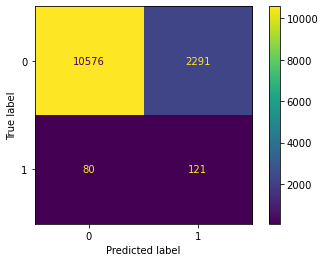

In [231]:
plot_confusion_matrix(lg, scaled_imputed_test, ytest)
plt.show()

In [232]:
print(roc_auc_score(ytest,pred_lg))   ## ROC-AUC of Base Model

0.7119688338443015


In [233]:
cohen_kappa_score(ytest,pred_lg)    ## Cohen-Kappa of Base Model

0.06609482576213799

### Decision Tree

In [234]:
Dt = DecisionTreeClassifier()

In [235]:
model = Dt.fit(final_train, ytrain_samp)

In [236]:
pred_Dt = model.predict(scaled_imputed_test)

In [237]:
print(classification_report(ytest, pred_Dt))     ## Base DT accuracy is 69%

              precision    recall  f1-score   support

           0       0.99      0.69      0.81     12867
           1       0.02      0.50      0.05       201

    accuracy                           0.69     13068
   macro avg       0.51      0.59      0.43     13068
weighted avg       0.97      0.69      0.80     13068



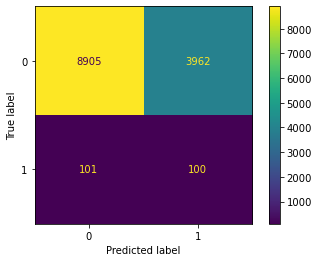

In [238]:
plot_confusion_matrix(model, scaled_imputed_test, ytest)
plt.show()

In [239]:
print(roc_auc_score(ytest,pred_Dt))   ## ROC-AUC of DT 

0.5947964769298761


In [240]:
cohen_kappa_score(ytest,pred_Dt)    ## Cohen-Kappa of DT

0.01813515654645792

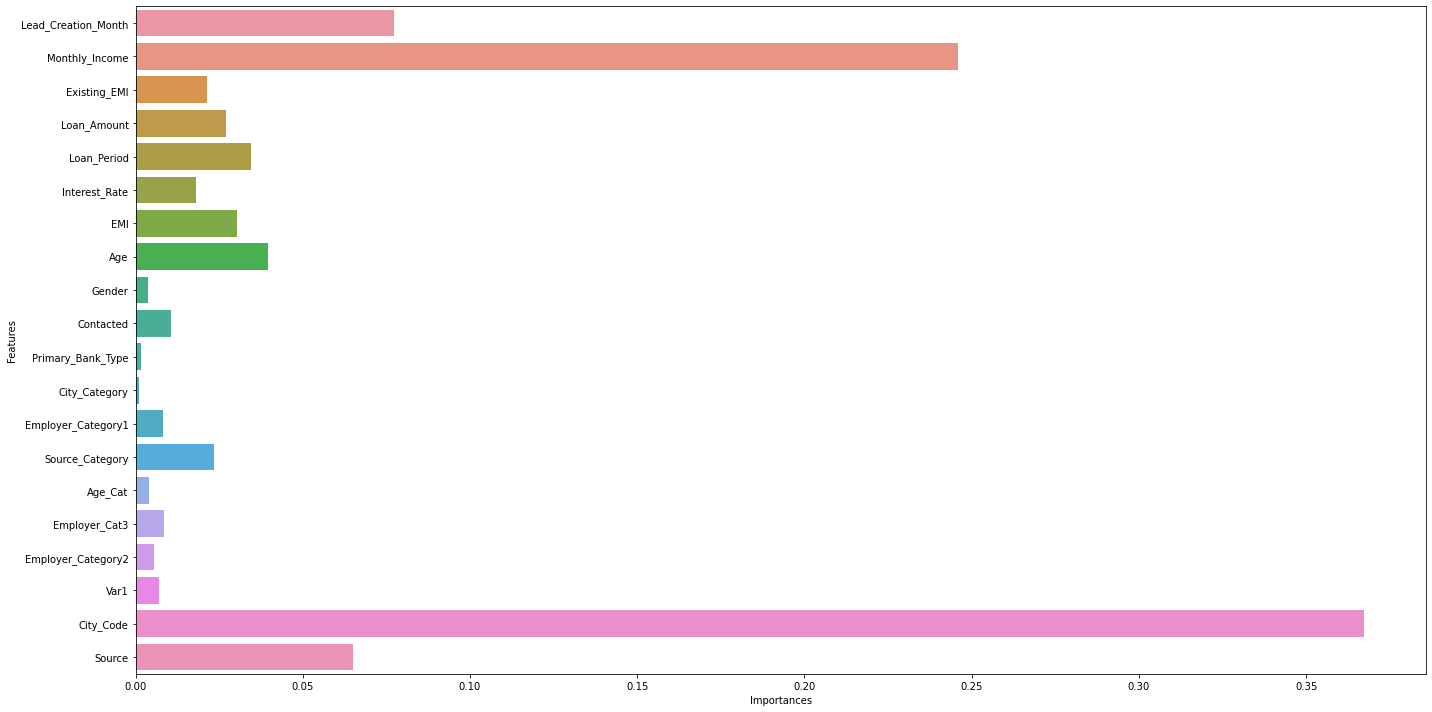

In [241]:
important_features = pd.DataFrame({'Features':final_train.columns,'Importances':model.feature_importances_})

important_features.sort_values(by = 'Importances',ascending = False)

plt.figure(figsize = [20,10])
sns.barplot(x = 'Importances', y = 'Features', data = important_features)
plt.tight_layout()
plt.show()

### Random Forest

In [242]:
from sklearn.ensemble import RandomForestClassifier

In [243]:
rf = RandomForestClassifier()
rf_model = rf.fit(final_train,ytrain_samp)



In [246]:
pred_rf = rf_model.predict(scaled_imputed_test)

In [247]:
print(classification_report(ytest, pred_rf))         ##RF Accuracy is 81%

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     12867
           1       0.03      0.40      0.06       201

    accuracy                           0.81     13068
   macro avg       0.51      0.61      0.48     13068
weighted avg       0.97      0.81      0.88     13068



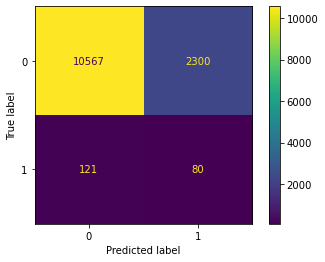

In [248]:
plot_confusion_matrix(rf_model, scaled_imputed_test, ytest)
plt.show()

In [249]:
print(roc_auc_score(ytest,pred_rf))   ## ROC-AUC of RF

0.6096290522208263


In [250]:
cohen_kappa_score(ytest,pred_rf)    ## Cohen-Kappa of RF

0.03460663739999459

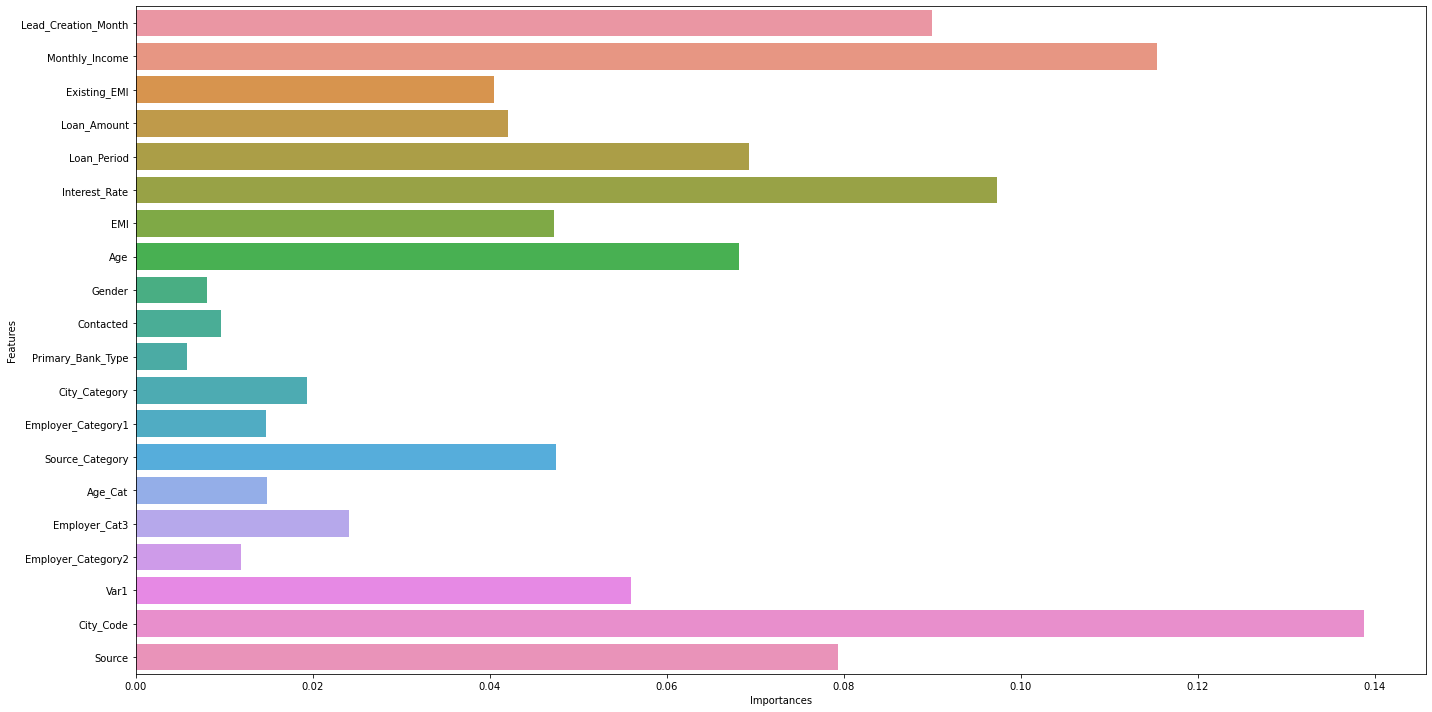

In [251]:
important_features = pd.DataFrame({'Features':final_train.columns,'Importances':rf_model.feature_importances_})

important_features.sort_values(by = 'Importances',ascending = False)

plt.figure(figsize = [20,10])
sns.barplot(x = 'Importances', y = 'Features', data = important_features)
plt.tight_layout()
plt.show()

### Building Models after applying VIF

In [252]:
new_train3.shape

(73582, 17)

In [253]:
new_test3.shape

(18399, 17)

In [254]:
ytrain_samp.shape

(73582,)

In [255]:
ytest_samp.shape

(18399,)

In [257]:
ytest.shape

(13068,)

In [259]:
new_scaled_test = scaled_imputed_test.drop(['Loan_Amount','Employer_Category2','Contacted'], axis = 1)

#### 1. LG

In [258]:
lg.fit(new_train3,ytrain_samp)

LogisticRegression()

In [260]:
pred_lg2 = lg.predict(new_scaled_test)

In [261]:
print(classification_report(ytest, pred_lg2))          ## Base Lg accuracy is 82%

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     12867
           1       0.05      0.61      0.09       201

    accuracy                           0.82     13068
   macro avg       0.52      0.71      0.50     13068
weighted avg       0.98      0.82      0.89     13068



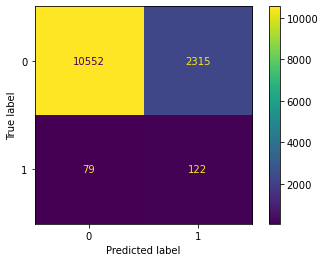

In [262]:
plot_confusion_matrix(lg, new_scaled_test, ytest)
plt.show()

In [263]:
print(roc_auc_score(ytest,pred_lg2))   ## ROC-AUC of Base Model

0.7135237777074062


In [264]:
cohen_kappa_score(ytest,pred_lg2)    ## Cohen-Kappa of Base Model ## Slight improvement after VIF.

0.0659502336408836

#### 2. DT

In [212]:
model2 = Dt.fit(new_train3, ytrain_samp)

In [265]:
pred_Dt2 = model2.predict(new_scaled_test)

In [266]:
print(classification_report(ytest, pred_Dt2))     ## Base DT accuracy is 70%

              precision    recall  f1-score   support

           0       0.99      0.70      0.82     12867
           1       0.02      0.48      0.05       201

    accuracy                           0.70     13068
   macro avg       0.51      0.59      0.43     13068
weighted avg       0.97      0.70      0.81     13068



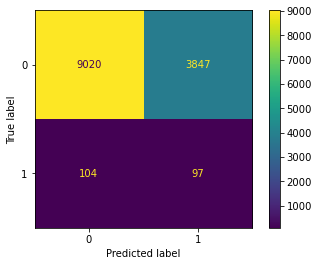

In [267]:
plot_confusion_matrix(model2, new_scaled_test, ytest)
plt.show()

In [268]:
print(roc_auc_score(ytest,pred_Dt2))   ## ROC-AUC of DT 

0.5918025865078896


In [269]:
cohen_kappa_score(ytest,pred_Dt2)    ## Cohen-Kappa of DT

0.018061605543499337

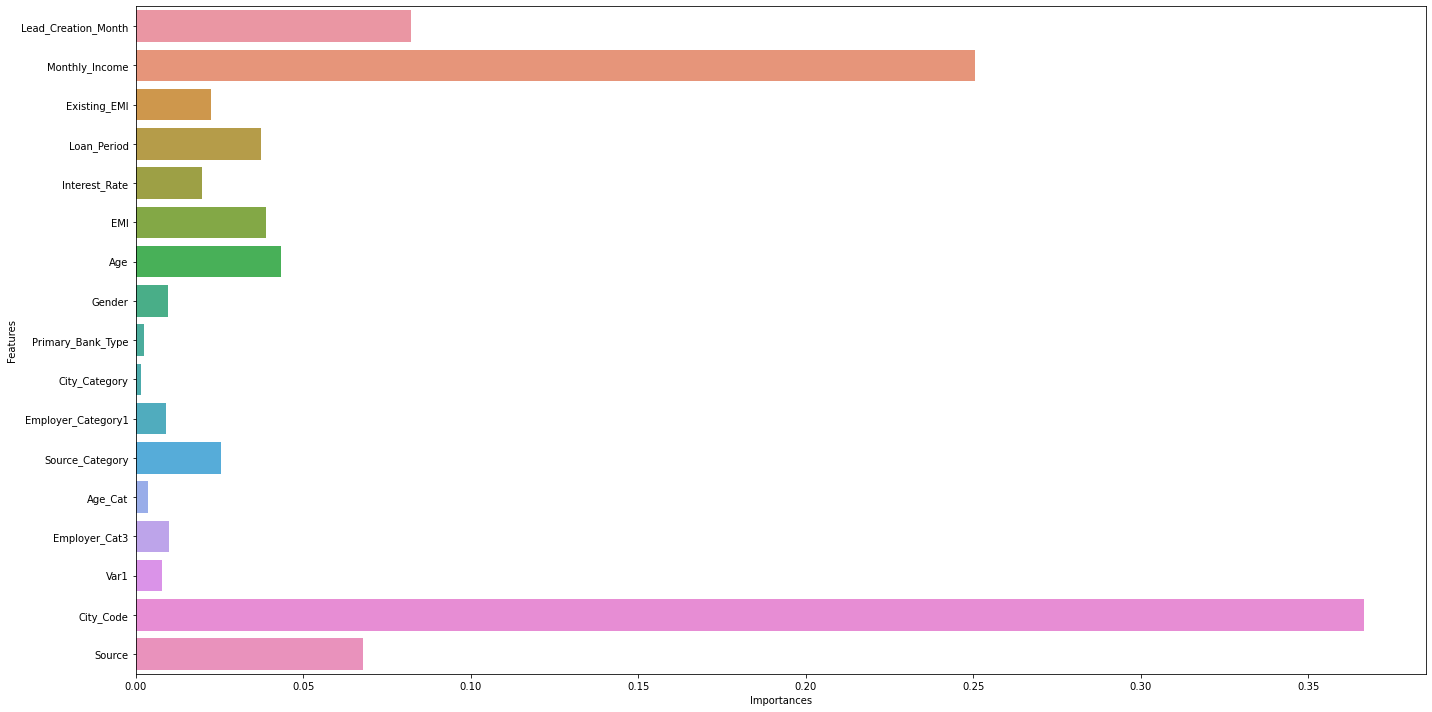

In [270]:
important_features = pd.DataFrame({'Features':new_train3.columns,'Importances':model2.feature_importances_})

important_features.sort_values(by = 'Importances',ascending = False)

plt.figure(figsize = [20,10])
sns.barplot(x = 'Importances', y = 'Features', data = important_features)
plt.tight_layout()
plt.show()

#### 3.RF

In [271]:
rf_model2 = rf.fit(new_train3,ytrain_samp)

In [272]:
pred_rf2 = rf_model.predict(new_scaled_test)

In [273]:
print(classification_report(ytest, pred_rf2))         ##RF Accuracy is 76%

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     12867
           1       0.03      0.47      0.06       201

    accuracy                           0.76     13068
   macro avg       0.51      0.62      0.46     13068
weighted avg       0.97      0.76      0.85     13068



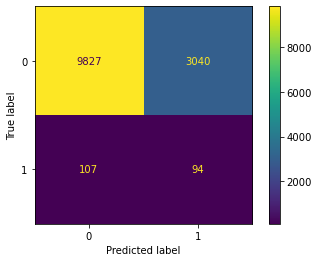

In [274]:
plot_confusion_matrix(rf_model2, new_scaled_test, ytest)
plt.show()

In [275]:
print(roc_auc_score(ytest,pred_rf2))   ## ROC-AUC of RF

0.6156991911507975


In [276]:
cohen_kappa_score(ytest,pred_rf2)    ## Cohen-Kappa of RF

0.028281236443192692

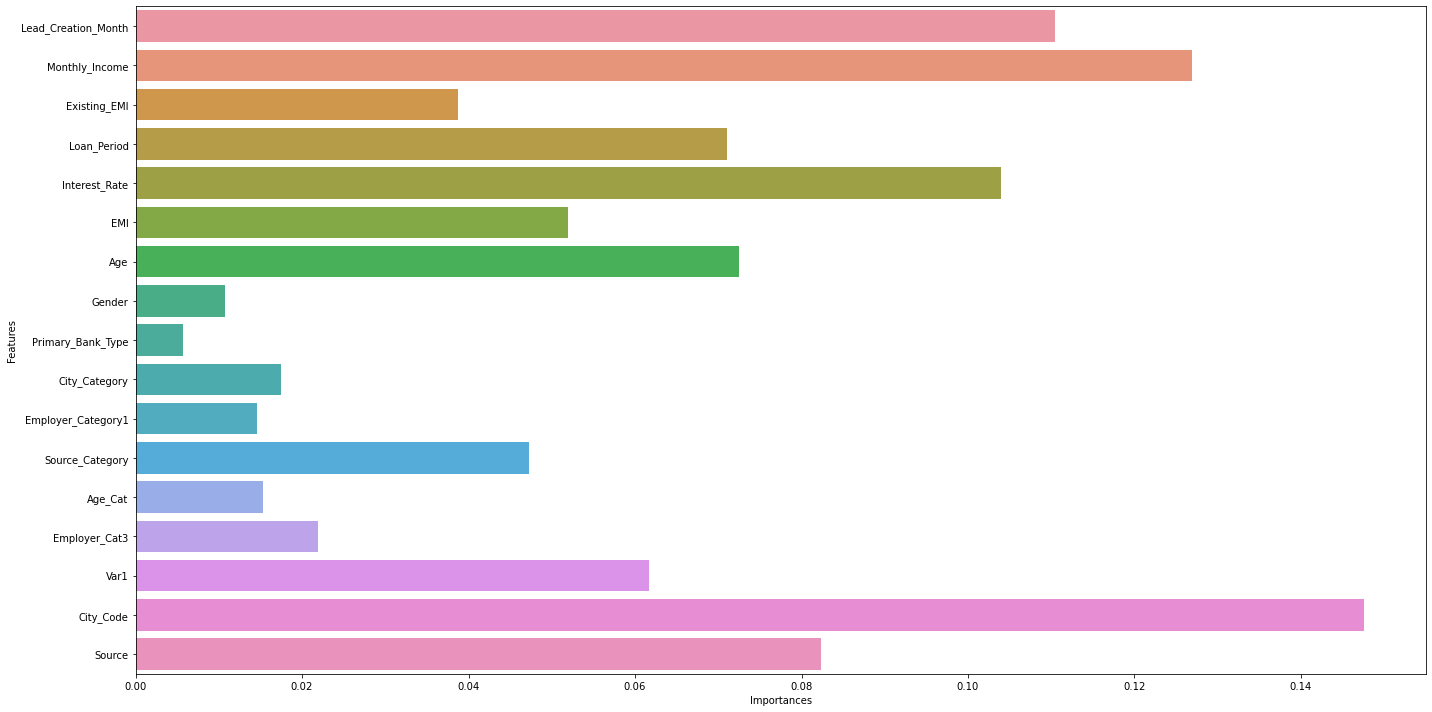

In [277]:
important_features = pd.DataFrame({'Features':new_train3.columns,'Importances':rf_model2.feature_importances_})

important_features.sort_values(by = 'Importances',ascending = False)

plt.figure(figsize = [20,10])
sns.barplot(x = 'Importances', y = 'Features', data = important_features)
plt.tight_layout()
plt.show()

### There are two observations on the impact of applying VIF on train and test and then build base models - 

1. The model performance metrics like accuracy,precission, recall,roc_auc score and cohen-kappa score have slight improvement.
2.The False Negatives have reduced, which are more problematic in our buisness case study.

### Validation Curve For Random Forest Hyper-Parameters

In [189]:
from sklearn.model_selection import validation_curve

In [190]:
RandomForestClassifier()

RandomForestClassifier()

#### 1. 'n_estimators'

In [191]:
#param_range = np.arange(1,100)
#train_scores, test_scores = validation_curve(
   # rf, final_train, ytrain_samp, param_name="n_estimators", param_range=param_range,n_jobs=1,cv=10)
#train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
#test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

#plt.title("Validation Curve with RF")
#plt.xlabel("n_estimators")
#plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
#lw = 2
#plt.semilogx(param_range, train_scores_mean, label="Training score",
             #color="darkorange", lw=lw)
#plt.fill_between(param_range, train_scores_mean - train_scores_std,
 #                train_scores_mean + train_scores_std, alpha=0.2,
  #               color="darkorange", lw=lw)
#plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
 #            color="navy", lw=lw)
#plt.fill_between(param_range, test_scores_mean - test_scores_std,
 #                test_scores_mean + test_scores_std, alpha=0.2,
  #               color="navy", lw=lw)
#plt.legend(loc="best")
#plt.show()

In [192]:
## Took more than 40 minutes to run..still no output.